## Index for Labour_education.ipynb code

Description: View of tendencies in the data of labour and education and relate both variables. 

#### 1. Analysis for Nuts2

1.1 **View data tendencies by region in Labour data**
   - Load and preprocess labour data.
   - Apply filtering and data transformations.

1.2 **View data tendencies by region in Education data**
   - Load and preprocess labour data.
   - Apply filtering and data transformations.

1.3 **Compare the relation between Education and labour**
   - Correlation
   - Regression
   
#### 2. Analysis for Nuts4

2.1 **View data tendencies by region in Labour data**
   - Load and preprocess labour data.
   - Apply filtering and data transformations.

2.2 **View data tendencies by region in Education data**
   - Load and preprocess labour data.
   - Apply filtering and data transformations.

2.3 **Compare the relation between education and labour**
   - Correlation
   - Regression
#### 3. Analysis for Nuts5

3.1 **View data tendencies by region in Labour data**
   - Load and preprocess labour data.
   - Apply filtering and data transformations.

3.2 **View data tendencies by region in Education data**
   - Load and preprocess labour data.
   - Apply filtering and data transformations.

3.3 **Compare the relation between education and labour**
   - Correlation
   - Regression


--------------------------------------------------------------------

## 1. Analysis for NUTS2

In [159]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots
import numpy as np

### 1.1 View data tendencies by region in Labour data

In [160]:
# Load the data of labour 

labour_NUTS2_df = pd.read_csv('../CSVs/Labour_NUTS2_2019.csv', sep=",")
labour_NUTS2_df.head(100)

NutsID                  region_name  NUTS_level  l.year  l.value  \
0       11                        Norte           2    2019   119432   
1       11                        Norte           2    2019    93339   
2       11                        Norte           2    2019    50025   
3       11                        Norte           2    2019    28116   
4       11                        Norte           2    2019    15198   
..     ...                          ...         ...     ...      ...   
58      30  Região Autónoma da Madeira            2    2019     1927   
59      30  Região Autónoma da Madeira            2    2019     1538   
60      30  Região Autónoma da Madeira            2    2019      716   
61      30  Região Autónoma da Madeira            2    2019      766   
62      30  Região Autónoma da Madeira            2    2019       56   

                      ltn.type_labour  
0   Total labour force in agriculture  
1                 Family labour force  
2                              Holder  
3                              Spouse  
4                Other family members  
..                                ...  
58               Other family members  
59            Non-family labour force  
60                            Regular  
61                        Non-regular  
62    Workers not hired by the holder  

[63 rows x 6 columns]

In [161]:
# Create a list of the region_name

labour_NUTS2_df_list = labour_NUTS2_df['region_name'].unique().tolist()
print(labour_NUTS2_df_list)



['Norte', 'Algarve', 'Centro', 'Área Metropolitana de Lisboa', 'Alentejo', 'Região Autónoma dos Açores ', 'Região Autónoma da Madeira ']


In [162]:
lab_no_totals = labour_NUTS2_df[labour_NUTS2_df['ltn.type_labour'] != 'Total labour force in agriculture'].copy()
lab_totals =labour_NUTS2_df[(labour_NUTS2_df['ltn.type_labour'] == 'Family labour force') |
                        (labour_NUTS2_df['ltn.type_labour'] == 'Non-family labour force')].copy()
lab_split_totals = labour_NUTS2_df[(labour_NUTS2_df['ltn.type_labour'] != 'Total labour force in agriculture') & 
                              (labour_NUTS2_df['ltn.type_labour'] != 'Family labour force') &
                              (labour_NUTS2_df['ltn.type_labour'] != 'Non-family labour force')].copy()

In [163]:
lab_totals = lab_totals.groupby(['NutsID', 'region_name'])['l.value'].sum().reset_index()
lab_split_totals = lab_split_totals.groupby(['NutsID', 'region_name'])['l.value'].sum().reset_index()

In [164]:
def lab_percentage(row):
    id = row['NutsID']
    value = row['l.value']
    
    if row['ltn.type_labour'] in ['Family labour force', 'Non-family labour force']:
        total_row = lab_totals[lab_totals['NutsID'] == id]
    else:
        total_row = lab_split_totals[lab_split_totals['NutsID'] == id]
        
    if not total_row.empty:
        total = total_row['l.value'].values[0]
    else:
        return None
    if total == 0:
        return None
    else:
        return round((value / total) * 100, 2)

In [165]:
# Calculate the percentage of each labor type within each region
labour_NUTS2_df['percentage'] = lab_no_totals.apply(lab_percentage, axis=1)
labour_NUTS2_df = labour_NUTS2_df[labour_NUTS2_df['ltn.type_labour'] != 'Total labour force in agriculture'].copy()
labour_NUTS2_df.head(10)

NutsID region_name  NUTS_level  l.year  l.value  \
1       11       Norte           2    2019    93339   
2       11       Norte           2    2019    50025   
3       11       Norte           2    2019    28116   
4       11       Norte           2    2019    15198   
5       11       Norte           2    2019    26092   
6       11       Norte           2    2019    12515   
7       11       Norte           2    2019    11186   
8       11       Norte           2    2019     2392   
10      15     Algarve           2    2019     7134   
11      15     Algarve           2    2019     4335   

                    ltn.type_labour  percentage  
1               Family labour force       78.15  
2                            Holder       41.89  
3                            Spouse       23.54  
4              Other family members       12.73  
5           Non-family labour force       21.85  
6                           Regular       10.48  
7                       Non-regular        9.37  
8   Workers not hired by the holder        2.00  
10              Family labour force       52.00  
11                           Holder       31.60

C:\Users\cespe\AppData\Local\Temp\ipykernel_22660\1065381294.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=labour_sum, x='l.value', y='ltn.type_labour', palette='viridis')


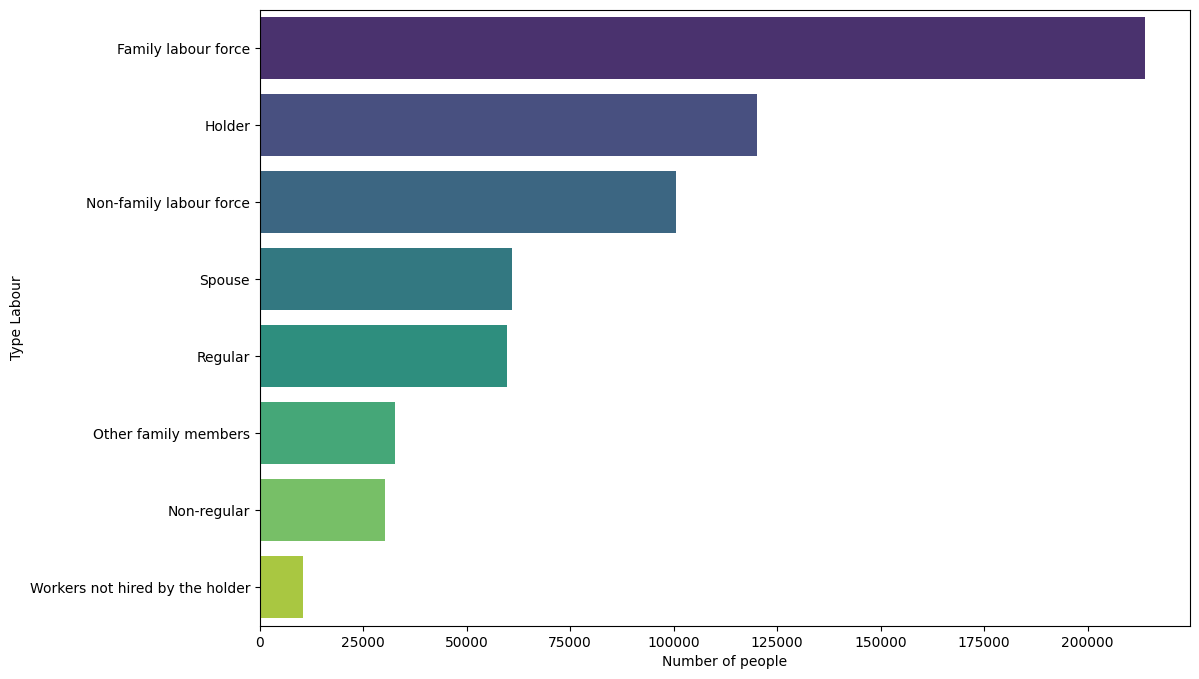

In [166]:

labour_2019_df = labour_NUTS2_df[labour_NUTS2_df['l.year'] == 2019]

# Sumar valores por tipo de labor
labour_sum = labour_2019_df.groupby('ltn.type_labour')['l.value'].sum().reset_index()

# Ordenar los datos para una mejor visualización
labour_sum = labour_sum.sort_values(by='l.value', ascending=False)

# Crear el gráfico
plt.figure(figsize=(12, 8))
sns.barplot(data=labour_sum, x='l.value', y='ltn.type_labour', palette='viridis')
plt.xlabel('Number of people')
plt.ylabel('Type Labour')
plt.title('')
plt.show()

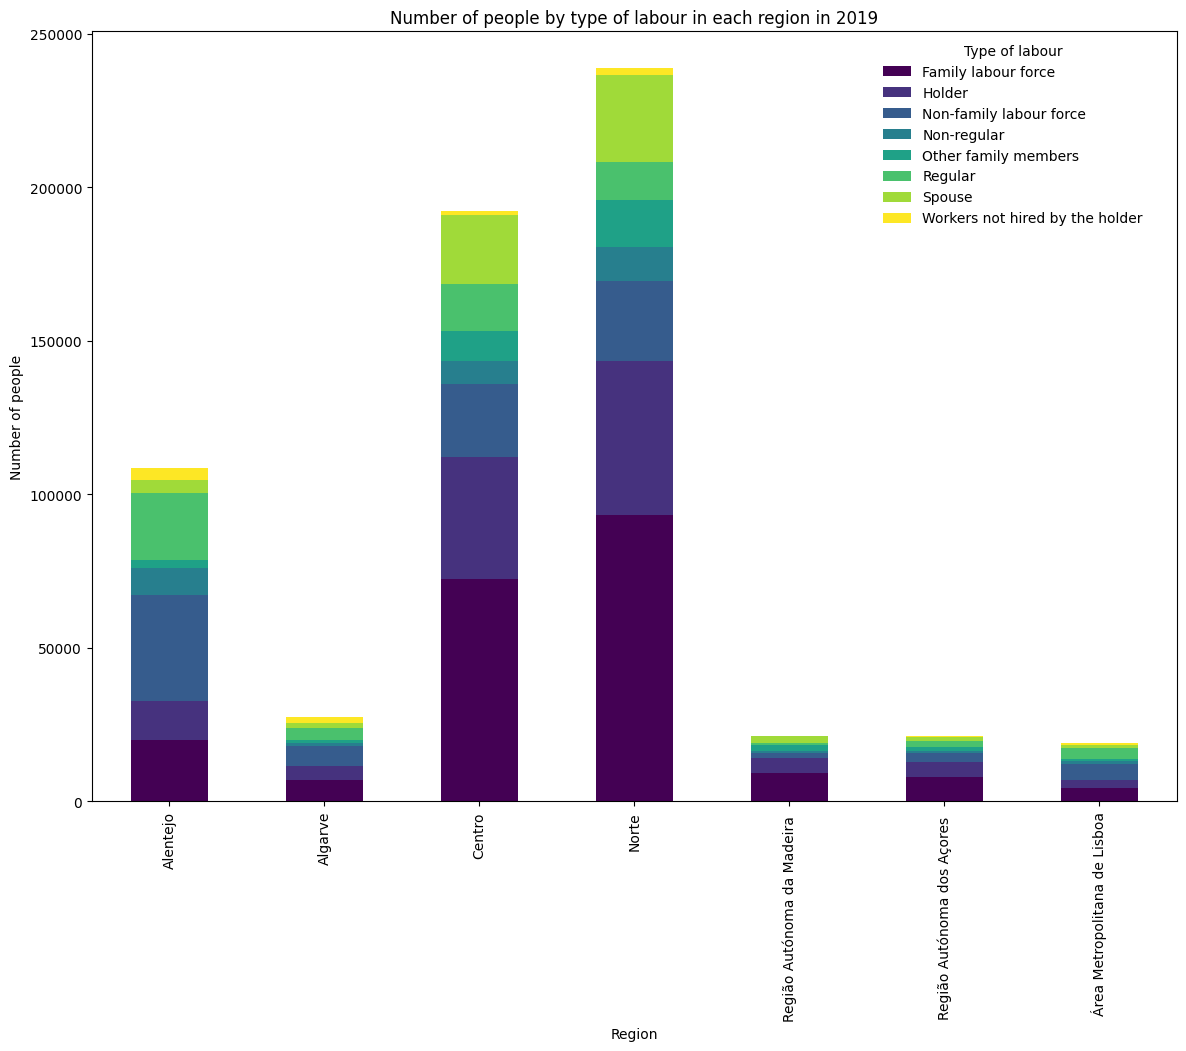

In [167]:
# Sum values by region and type of labour
labour_sum_region = labour_2019_df.groupby(['region_name', 'ltn.type_labour'])['l.value'].sum().unstack().fillna(0)

# Create the plot
fig, ax = plt.subplots(figsize=(14, 10))
labour_sum_region.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')
ax.set_xlabel('Region')
ax.set_ylabel('Number of people')
ax.set_title('Number of people by type of labour in each region in 2019')

# Customize legend
legend = ax.legend(title='Type of labour', bbox_to_anchor=(0.98, 1), loc='upper right', frameon=False)

plt.show()

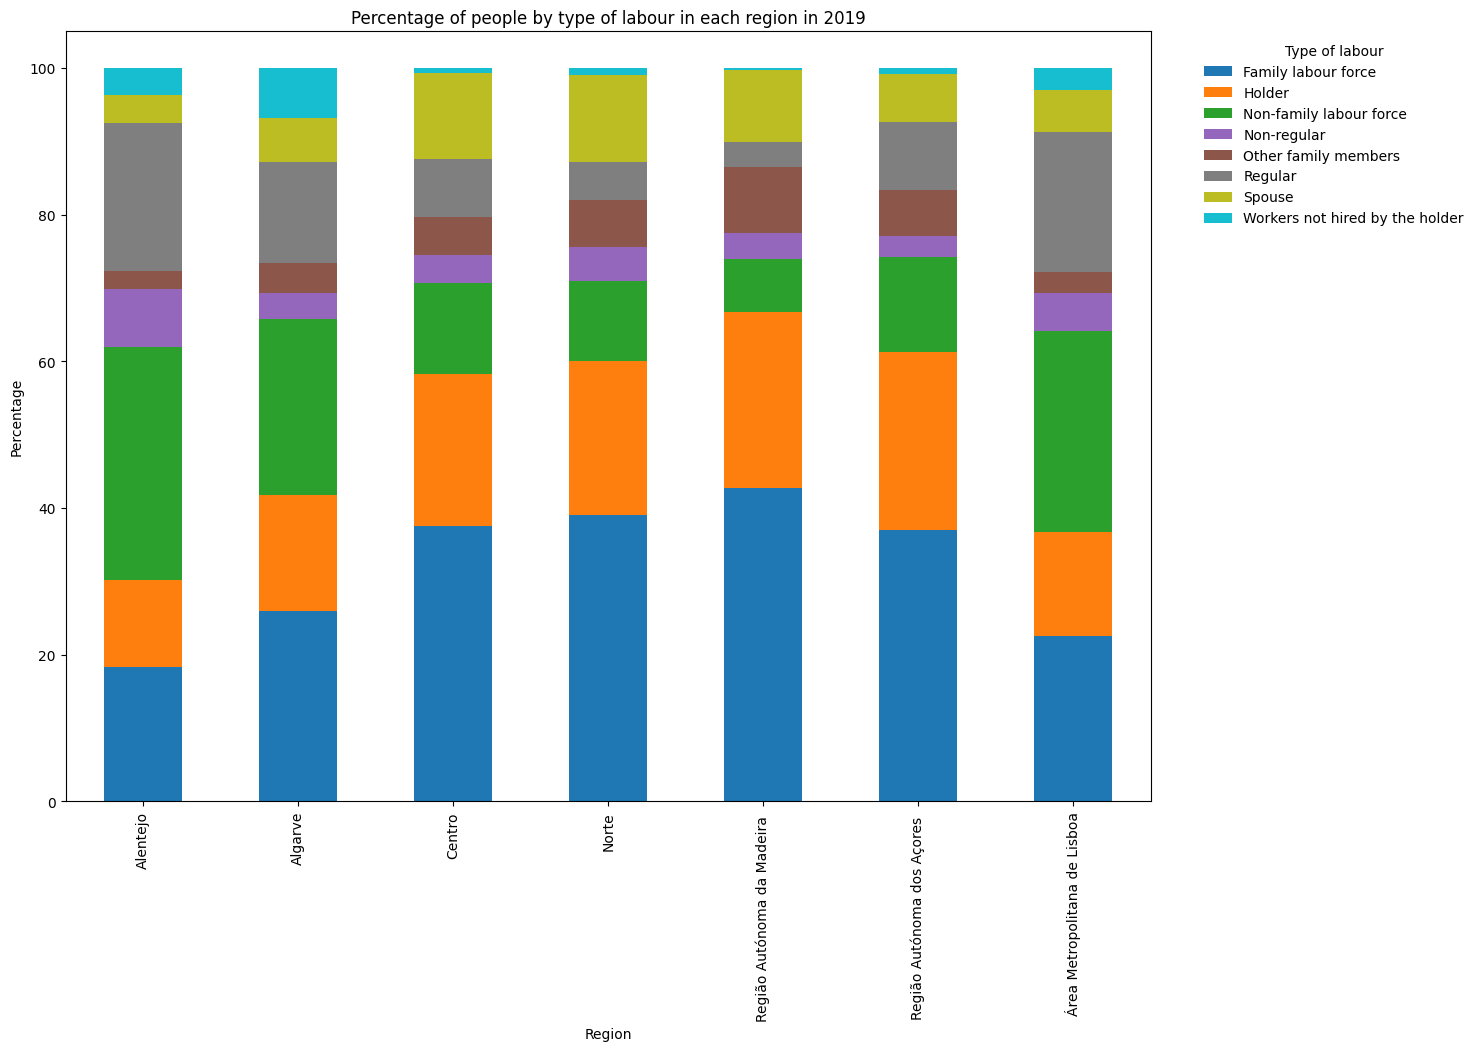

In [168]:

# Calculate the total labor force per region
total_labour_per_region = labour_2019_df.groupby('region_name')['l.value'].transform('sum')

# Calculate the percentage of each labor type within each region
labour_2019_df['percentage'] = (labour_2019_df['l.value'] / total_labour_per_region) * 100

# Pivot the table for easier plotting
labour_pivot = labour_2019_df.pivot_table(values='percentage', index='region_name', columns='ltn.type_labour', fill_value=0)


# Create the plot
fig, ax = plt.subplots(figsize=(14, 10))
labour_pivot.plot(kind='bar', stacked=True, ax=ax, colormap='tab10')
ax.set_xlabel('Region')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of people by type of labour in each region in 2019')

# Customize legend
legend = ax.legend(title='Type of labour', bbox_to_anchor=(1.3, 1), loc='upper right', frameon=False)

plt.show()

In [169]:
# Verify the calculations of the %
labour_pivot = pd.DataFrame(labour_pivot)
labour_pivot.head()

ltn.type_labour              Family labour force     Holder  \
region_name                                                   
Alentejo                               18.272758  11.955352   
Algarve                                25.998542  15.798105   
Centro                                 37.602212  20.741388   
Norte                                  39.076374  20.942967   
Região Autónoma da Madeira             42.796947  23.957114   

ltn.type_labour              Non-family labour force  Non-regular  \
region_name                                                         
Alentejo                                   31.726782     7.908020   
Algarve                                    24.001458     3.491254   
Centro                                     12.397528     3.765160   
Norte                                      10.923416     4.683019   
Região Autónoma da Madeira                  7.200712     3.586310   

ltn.type_labour              Other family members    Regular     Spouse  \
region_name                                                               
Alentejo                                 2.490737  20.142879   3.826669   
Algarve                                  4.198251  13.684402   6.002187   
Centro                                   5.165593   7.953464  11.695232   
Norte                                    6.362643   5.239405  11.770764   
Região Autónoma da Madeira               9.021958   3.352217   9.822557   

ltn.type_labour              Workers not hired by the holder  
region_name                                                   
Alentejo                                            3.676802  
Algarve                                             6.825802  
Centro                                              0.679423  
Norte                                               1.001411  
Região Autónoma da Madeira                          0.262185

### 1.2 View data tendencies by region in Education data

In [170]:
# Load the data of labour 

education_NUTS2_df = pd.read_csv('../CSVs/Education_NUTS2_2019.csv', sep=",")
education_NUTS2_df.fillna('None', inplace=True)
education_NUTS2_df.head(100)



NutsID                   region_name  NUTS_level  e.year  e.value  \
0       11                         Norte           2    2019   257718   
1       11                         Norte           2    2019    31554   
2       11                         Norte           2    2019   161233   
3       11                         Norte           2    2019    35410   
4       11                         Norte           2    2019    29521   
5       15                       Algarve           2    2019    27522   
6       15                       Algarve           2    2019     3357   
7       15                       Algarve           2    2019    16943   
8       15                       Algarve           2    2019     4028   
9       15                       Algarve           2    2019     3194   
10      16                        Centro           2    2019   224976   
11      16                        Centro           2    2019    24533   
12      16                        Centro           2    2019   145739   
13      16                        Centro           2    2019    31352   
14      16                        Centro           2    2019    23352   
15      17  Área Metropolitana de Lisboa           2    2019    13525   
16      17  Área Metropolitana de Lisboa           2    2019     1283   
17      17  Área Metropolitana de Lisboa           2    2019     8744   
18      17  Área Metropolitana de Lisboa           2    2019     2097   
19      17  Área Metropolitana de Lisboa           2    2019     1401   
20      18                      Alentejo           2    2019    75756   
21      18                      Alentejo           2    2019     8383   
22      18                      Alentejo           2    2019    43349   
23      18                      Alentejo           2    2019    12456   
24      18                      Alentejo           2    2019    11568   
25      20   Região Autónoma dos Açores            2    2019    29143   
26      20   Região Autónoma dos Açores            2    2019     2819   
27      20   Região Autónoma dos Açores            2    2019    19643   
28      20   Região Autónoma dos Açores            2    2019     4333   
29      20   Região Autónoma dos Açores            2    2019     2348   
30      30   Região Autónoma da Madeira            2    2019    36931   
31      30   Região Autónoma da Madeira            2    2019     5184   
32      30   Região Autónoma da Madeira            2    2019    22273   
33      30   Região Autónoma da Madeira            2    2019     5816   
34      30   Região Autónoma da Madeira            2    2019     3658   

            el.education_level  
0                        Total  
1                         None  
2                        Basic  
3   Secondary / post-secondary  
4                     Superior  
5                        Total  
6                         None  
7                        Basic  
8   Secondary / post-secondary  
9                     Superior  
10                       Total  
11                        None  
12                       Basic  
13  Secondary / post-secondary  
14                    Superior  
15                       Total  
16                        None  
17                       Basic  
18  Secondary / post-secondary  
19                    Superior  
20                       Total  
21                        None  
22                       Basic  
23  Secondary / post-secondary  
24                    Superior  
25                       Total  
26                        None  
27                       Basic  
28  Secondary / post-secondary  
29                    Superior  
30                       Total  
31                        None  
32                       Basic  
33  Secondary / post-secondary  
34                    Superior

In [171]:

def ed_percentage(row):
    id = row['NutsID']
    value = row['e.value']
    total = education_NUTS2_df[(education_NUTS2_df['NutsID'] == id) & (education_NUTS2_df['el.education_level'] == 'Total')]['e.value'].values[0]
    if total == 0:
        return 0
    else:
        return (value / total) * 100

# Filter out rows where education_level is not 'Total'
education_NUTS2_df_no_totals = education_NUTS2_df[education_NUTS2_df['el.education_level'] != 'Total'].copy()

# Apply the ed_percentage function to calculate percentages
education_NUTS2_df_no_totals['ed_level_perc'] = education_NUTS2_df_no_totals.apply(ed_percentage, axis=1)

education_NUTS2_df_no_totals.head()

NutsID region_name  NUTS_level  e.year  e.value  \
1      11       Norte           2    2019    31554   
2      11       Norte           2    2019   161233   
3      11       Norte           2    2019    35410   
4      11       Norte           2    2019    29521   
6      15     Algarve           2    2019     3357   

           el.education_level  ed_level_perc  
1                        None      12.243615  
2                       Basic      62.561792  
3  Secondary / post-secondary      13.739824  
4                    Superior      11.454768  
6                        None      12.197515

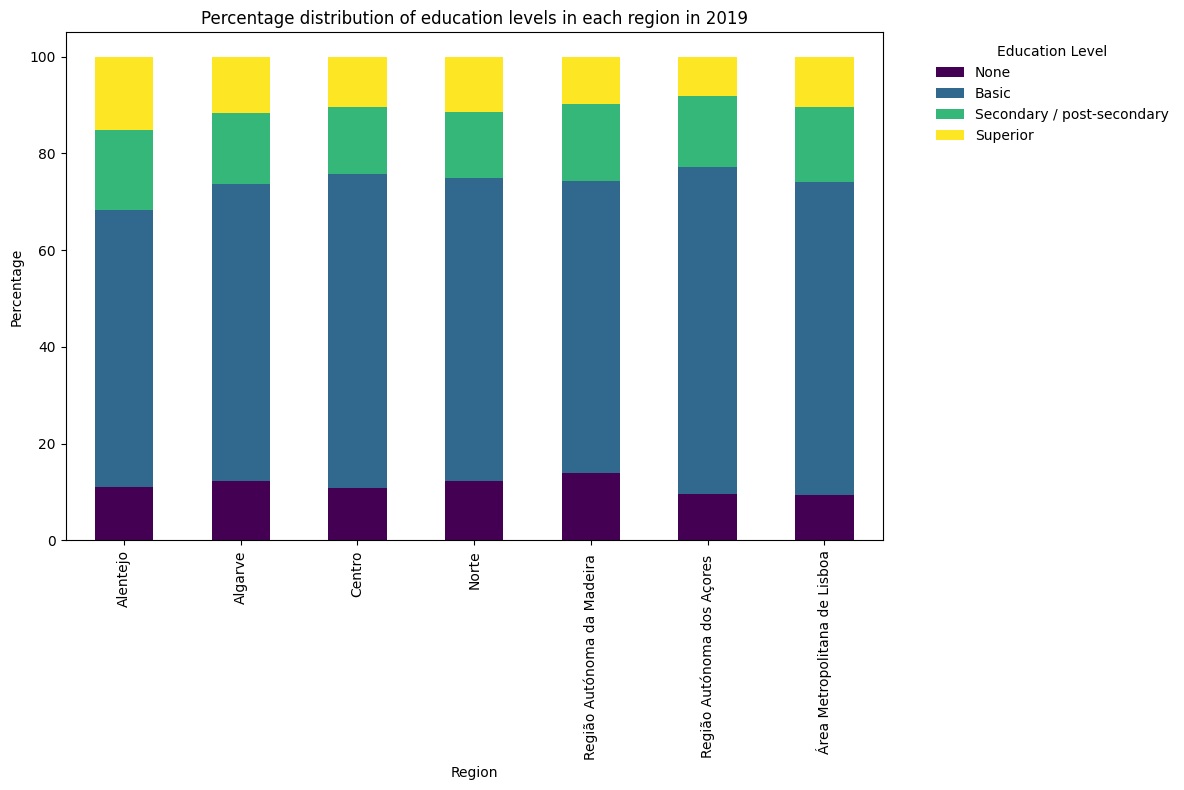

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pivote de la tabla para facilitar la visualización
education_pivot = education_NUTS2_df_no_totals.pivot_table(values='ed_level_perc', index='region_name', columns='el.education_level')

# Ordenar las columnas para el gráfico
education_pivot = education_pivot[['None', 'Basic', 'Secondary / post-secondary', 'Superior']]

# Crear el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(12, 8))
education_pivot.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')

# Personalizar el gráfico
ax.set_xlabel('Region')
ax.set_ylabel('Percentage')
ax.set_title('Percentage distribution of education levels in each region in 2019')

# Ajustar la leyenda
legend = ax.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

plt.tight_layout()
plt.show()

In [173]:
import matplotlib.pyplot as plt
import pandas as pd


# Filtrar las regiones continentales y las regiones insulares
continent_regions = ['Norte', 'Algarve', 'Centro', 'Área Metropolitana de Lisboa', 'Alentejo']
island_regions = ['Região Autónoma dos Açores', 'Região Autónoma da Madeira']

# Filtrar los datos por regiones continentales e islas
continent_df = education_NUTS2_df_no_totals[education_NUTS2_df_no_totals['region_name'].str.strip().isin(continent_regions)]
island_df = education_NUTS2_df_no_totals[education_NUTS2_df_no_totals['region_name'].str.strip().isin(island_regions)]

island_df.head()


NutsID                  region_name  NUTS_level  e.year  e.value  \
26      20  Região Autónoma dos Açores            2    2019     2819   
27      20  Região Autónoma dos Açores            2    2019    19643   
28      20  Região Autónoma dos Açores            2    2019     4333   
29      20  Região Autónoma dos Açores            2    2019     2348   
31      30  Região Autónoma da Madeira            2    2019     5184   

            el.education_level  ed_level_perc  
26                        None       9.672992  
27                       Basic      67.402121  
28  Secondary / post-secondary      14.868064  
29                    Superior       8.056823  
31                        None      14.036988

In [174]:
# Pivote de la tabla para continent_df
continent_pivot = continent_df.pivot_table(values='ed_level_perc', index='region_name', columns='el.education_level', fill_value=0)

# Pivote de la tabla para island_df
island_pivot = island_df.pivot_table(values='ed_level_perc', index='region_name', columns='el.education_level', fill_value=0)

# See the results to analyze on text 
island_pivot.head()

el.education_level               Basic       None  Secondary / post-secondary  \
region_name                                                                     
Região Autónoma da Madeira   60.309767  14.036988                   15.748287   
Região Autónoma dos Açores   67.402121   9.672992                   14.868064   

el.education_level           Superior  
region_name                            
Região Autónoma da Madeira   9.904958  
Região Autónoma dos Açores   8.056823

In [175]:
# See the results to analyze on text 

continent_pivot.head()

el.education_level                Basic       None  \
region_name                                          
Alentejo                      57.221870  11.065790   
Algarve                       61.561660  12.197515   
Centro                        64.779799  10.904719   
Norte                         62.561792  12.243615   
Área Metropolitana de Lisboa  64.650647   9.486137   

el.education_level            Secondary / post-secondary   Superior  
region_name                                                          
Alentejo                                       16.442262  15.270078  
Algarve                                        14.635564  11.605261  
Centro                                         13.935709  10.379774  
Norte                                          13.739824  11.454768  
Área Metropolitana de Lisboa                   15.504621  10.358595

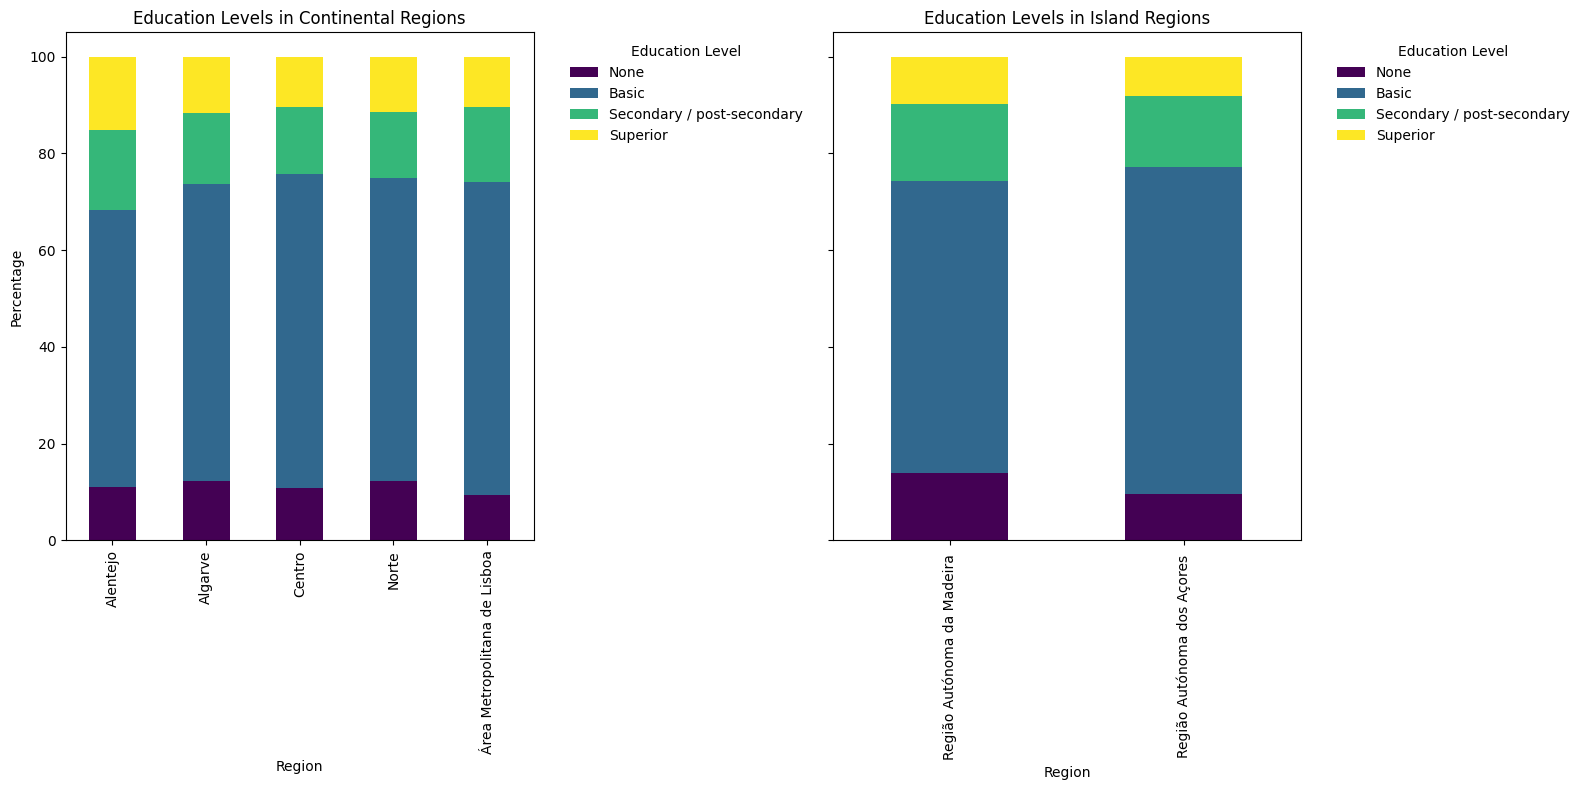

In [176]:
# Ordenar las columnas para el gráfico
continent_pivot = continent_pivot[['None', 'Basic', 'Secondary / post-secondary', 'Superior']]
island_pivot = island_pivot[['None', 'Basic', 'Secondary / post-secondary', 'Superior']]

# Crear el gráfico de barras apiladas para regiones continentales
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

continent_pivot.plot(kind='bar', stacked=True, ax=axes[0], colormap='viridis')
axes[0].set_title('Education Levels in Continental Regions')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Percentage')

# Crear el gráfico de barras apiladas para regiones insulares
island_pivot.plot(kind='bar', stacked=True, ax=axes[1], colormap='viridis')
axes[1].set_title('Education Levels in Island Regions')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Percentage')

# Ajustar la leyenda
axes[0].legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
axes[1].legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

plt.tight_layout()
plt.show()


### 1.3 Compare the relation between education and labour 

In [177]:
import pandas as pd

# Asegurarse de que los nombres de las regiones no tengan espacios adicionales
education_NUTS2_df_no_totals['region_name'] = education_NUTS2_df_no_totals['region_name'].str.strip()
labour_NUTS2_df['region_name'] = labour_NUTS2_df['region_name'].str.strip()

# Filtrar los datos de educación y trabajo para el mismo año (2019 en este caso)
education_2019 = education_NUTS2_df_no_totals[education_NUTS2_df_no_totals['e.year'] == 2019]
labour_2019 = labour_NUTS2_df[labour_NUTS2_df['l.year'] == 2019]

# Pivotear los datos de educación para obtener los porcentajes por nivel educativo
education_pivot = education_2019.pivot_table(values='ed_level_perc', index='region_name', columns='el.education_level', fill_value=0)

# Pivotear los datos de trabajo para obtener los valores por tipo de labor
labour_pivot = labour_2019.pivot_table(values='l.value', index='region_name', columns='ltn.type_labour', fill_value=0)

# Unir los datos de educación y trabajo
combined_df = pd.concat([education_pivot, labour_pivot], axis=1, join='inner')

# Ver el DataFrame combinado
print(combined_df.head())

                                Basic       None  Secondary / post-secondary  \
region_name                                                                    
Alentejo                    57.221870  11.065790                   16.442262   
Algarve                     61.561660  12.197515                   14.635564   
Centro                      64.779799  10.904719                   13.935709   
Norte                       62.561792  12.243615                   13.739824   
Região Autónoma da Madeira  60.309767  14.036988                   15.748287   

                             Superior  Family labour force   Holder  \
region_name                                                           
Alentejo                    15.270078              19874.0  13003.0   
Algarve                     11.605261               7134.0   4335.0   
Centro                      10.379774              72335.0  39900.0   
Norte                       11.454768              93339.0  50025.0   
Região Autóno

                                    Basic      None  \
Basic                            1.000000 -0.573378   
None                            -0.573378  1.000000   
Secondary / post-secondary      -0.556555 -0.008178   
Superior                        -0.851510  0.149315   
Family labour force              0.077148  0.143201   
Holder                           0.061817  0.130264   
Non-family labour force         -0.465304 -0.030949   
Non-regular                     -0.329876  0.084087   
Other family members             0.061987  0.196074   
Regular                         -0.468306 -0.105872   
Spouse                           0.110088  0.138317   
Workers not hired by the holder -0.680340  0.042533   

                                 Secondary / post-secondary  Superior  \
Basic                                             -0.556555 -0.851510   
None                                              -0.008178  0.149315   
Secondary / post-secondary                         1.000000  0.40

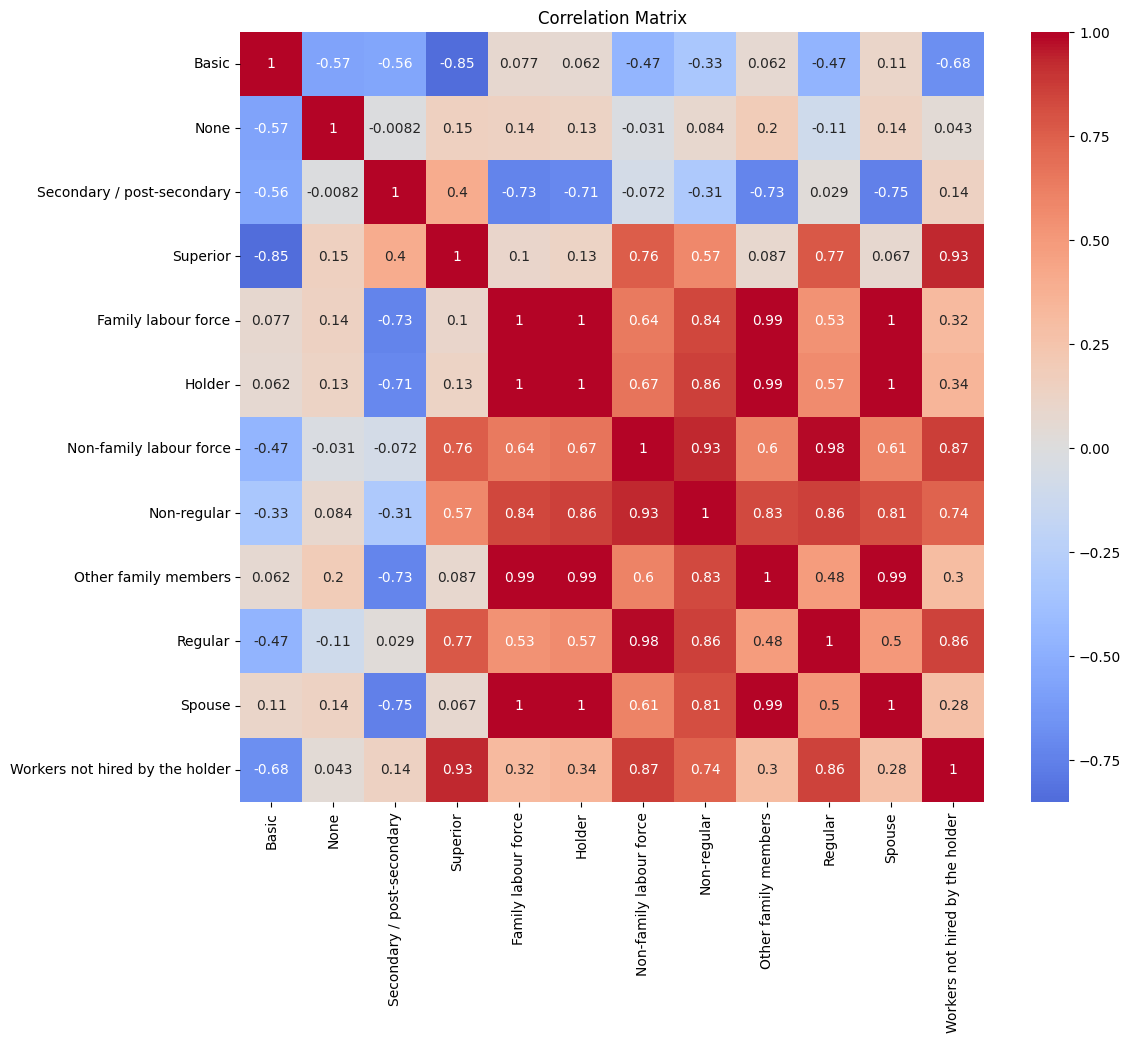

In [178]:
# Calcular la matriz de correlación
correlation_matrix = combined_df.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


## 2. Analysis for NUTS4

### 2.1 View data tendencies by region in Labour data

In [179]:
labour_NUTS4_df = pd.read_csv('../CSVs/Labour_NUTS4_2019.csv', sep=",")
labour_NUTS4_df.head(3000)

NutsID        region_name  NUTS_level  l.year  l.value  \
0     1111601  Arcos de Valdevez           4    2019     2087   
1     1111601  Arcos de Valdevez           4    2019     1935   
2     1111601  Arcos de Valdevez           4    2019     1046   
3     1111601  Arcos de Valdevez           4    2019      626   
4     1111601  Arcos de Valdevez           4    2019      263   
...       ...                ...         ...     ...      ...   
2767  3003201        Porto Santo           4    2019       15   
2768  3003201        Porto Santo           4    2019       21   
2769  3003201        Porto Santo           4    2019       17   
2770  3003201        Porto Santo           4    2019        4   
2771  3003201        Porto Santo           4    2019        0   

                        ltn.type_labour  
0     Total labour force in agriculture  
1                   Family labour force  
2                                Holder  
3                                Spouse  
4                  Other family members  
...                                 ...  
2767               Other family members  
2768            Non-family labour force  
2769                            Regular  
2770                        Non-regular  
2771    Workers not hired by the holder  

[2772 rows x 6 columns]

In [180]:
# Create a list of the region_name

labour_NUTS4_df_list = labour_NUTS4_df['region_name'].unique().tolist()
#print(labour_NUTS4_df_list)

print(len(labour_NUTS4_df_list))


306


In [181]:
# Definir el mapeo de NutsID a nombres de región
nuts_to_region = {
    '11': 'Norte',
    '15': 'Algarve',
    '16': 'Centro',
    '17': 'Lisboa',
    '18': 'Alentejo',
    '20': 'Açores',
    '30': 'Madeira'
}

# Crear una función para extraer los nombres de región de los códigos NutsID
def get_region_name(nutsid):
    # Extraer los primeros 3 caracteres del NutsID para el mapeo
    prefix = nutsid[:2]
    # Devolver el nombre de la región correspondiente
    return nuts_to_region.get(prefix, 'Unknown')

# Añadir una nueva columna al DataFrame con los nombres de región
labour_NUTS4_df['region_name_nuts2'] = labour_NUTS4_df['NutsID'].apply(get_region_name)

# Imprimir las primeras filas del DataFrame resultante
labour_NUTS4_df.head(10)


NutsID        region_name  NUTS_level  l.year  l.value  \
0  1111601  Arcos de Valdevez           4    2019     2087   
1  1111601  Arcos de Valdevez           4    2019     1935   
2  1111601  Arcos de Valdevez           4    2019     1046   
3  1111601  Arcos de Valdevez           4    2019      626   
4  1111601  Arcos de Valdevez           4    2019      263   
5  1111601  Arcos de Valdevez           4    2019      152   
6  1111601  Arcos de Valdevez           4    2019       75   
7  1111601  Arcos de Valdevez           4    2019       65   
8  1111601  Arcos de Valdevez           4    2019       11   
9  1111602            Caminha           4    2019      407   

                     ltn.type_labour region_name_nuts2  
0  Total labour force in agriculture             Norte  
1                Family labour force             Norte  
2                             Holder             Norte  
3                             Spouse             Norte  
4               Other family members             Norte  
5            Non-family labour force             Norte  
6                            Regular             Norte  
7                        Non-regular             Norte  
8    Workers not hired by the holder             Norte  
9  Total labour force in agriculture             Norte

In [182]:
lab_no_totals = labour_NUTS4_df[labour_NUTS4_df['ltn.type_labour'] != 'Total labour force in agriculture'].copy()
lab_totals =labour_NUTS4_df[(labour_NUTS4_df['ltn.type_labour'] == 'Family labour force') |
                        (labour_NUTS4_df['ltn.type_labour'] == 'Non-family labour force')].copy()
lab_split_totals = labour_NUTS4_df[(labour_NUTS4_df['ltn.type_labour'] != 'Total labour force in agriculture') & 
                              (labour_NUTS4_df['ltn.type_labour'] != 'Family labour force') &
                              (labour_NUTS4_df['ltn.type_labour'] != 'Non-family labour force')].copy()

In [183]:
lab_totals = lab_totals.groupby(['NutsID', 'region_name', 'region_name_nuts2'])['l.value'].sum().reset_index()
lab_split_totals = lab_split_totals.groupby(['NutsID', 'region_name', 'region_name_nuts2'])['l.value'].sum().reset_index()

In [184]:
def lab_percentage(row):
    id = row['NutsID']
    value = row['l.value']
    
    if row['ltn.type_labour'] in ['Family labour force', 'Non-family labour force']:
        total_row = lab_totals[lab_totals['NutsID'] == id]
    else:
        total_row = lab_split_totals[lab_split_totals['NutsID'] == id]
        
    if not total_row.empty:
        total = total_row['l.value'].values[0]
    else:
        return None
    if total == 0:
        return None
    else:
        return round((value / total) * 100, 2)



In [185]:
# Calculate the percentage of each labor type within each region
labour_NUTS4_df['percentage'] = lab_no_totals.apply(lab_percentage, axis=1)
labour_NUTS4_df = labour_NUTS4_df[labour_NUTS4_df['ltn.type_labour'] != 'Total labour force in agriculture'].copy()
labour_NUTS4_df.head(10)

NutsID        region_name  NUTS_level  l.year  l.value  \
1   1111601  Arcos de Valdevez           4    2019     1935   
2   1111601  Arcos de Valdevez           4    2019     1046   
3   1111601  Arcos de Valdevez           4    2019      626   
4   1111601  Arcos de Valdevez           4    2019      263   
5   1111601  Arcos de Valdevez           4    2019      152   
6   1111601  Arcos de Valdevez           4    2019       75   
7   1111601  Arcos de Valdevez           4    2019       65   
8   1111601  Arcos de Valdevez           4    2019       11   
10  1111602            Caminha           4    2019      326   
11  1111602            Caminha           4    2019      159   

                    ltn.type_labour region_name_nuts2  percentage  
1               Family labour force             Norte       92.72  
2                            Holder             Norte       50.14  
3                            Spouse             Norte       30.01  
4              Other family members             Norte       12.61  
5           Non-family labour force             Norte        7.28  
6                           Regular             Norte        3.60  
7                       Non-regular             Norte        3.12  
8   Workers not hired by the holder             Norte        0.53  
10              Family labour force             Norte       80.10  
11                           Holder             Norte       38.97

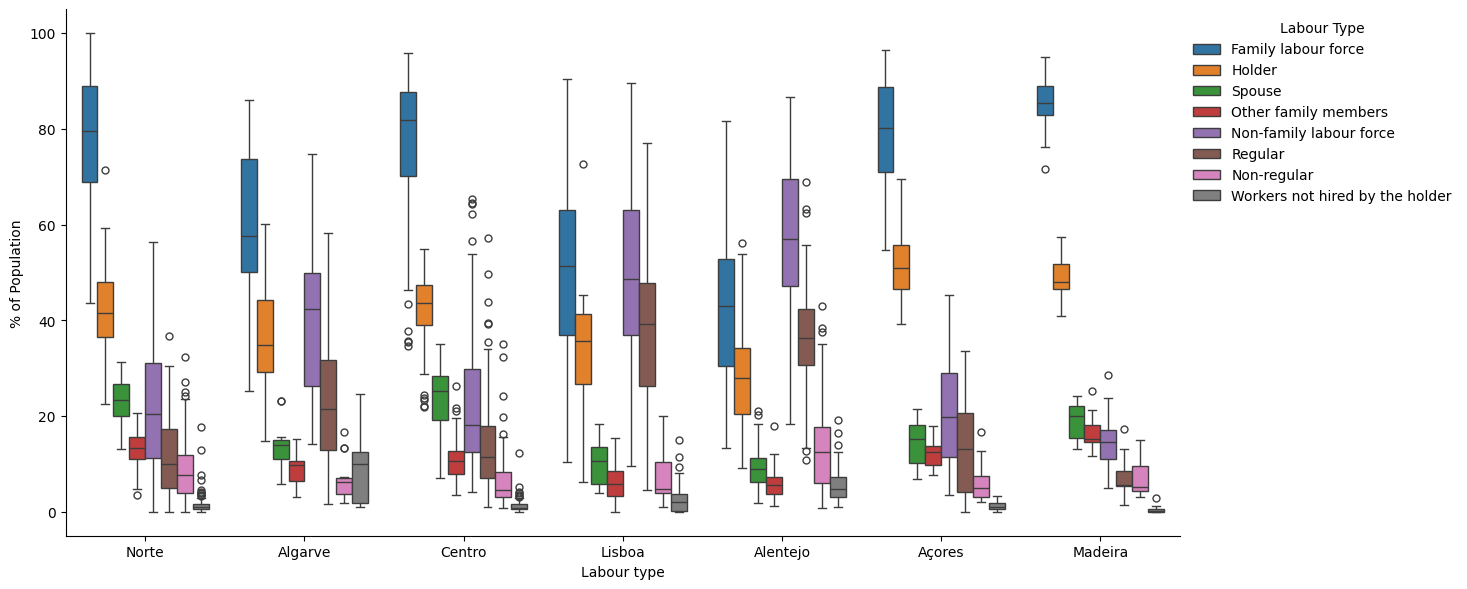

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the boxplot catplot plot
plot = sns.catplot(
    data=labour_NUTS4_df, # Use DataFrame labour_NUTS4_df
    x="region_name_nuts2", # Variable on x-axis: region_name_nuts2
    y="percentage", # Variable on y-axis: percentage
    hue="ltn.type_labour", # Variable to separate by color: ltn.type_labour
    kind="box", # Chart type: boxplot
    height=6, # Height of the figure
    aspect=2, # Aspect ratio
    legend_out=False # Disable legend outside the plot
)

# Add labels to axes
plt.xlabel('Labour type') # Label the x-axis
plt.ylabel('% of Population') # y-axis label

# Adjust the position of the legend outside the chart
plt.legend(title='Labour Type', bbox_to_anchor=(1.0, 1), loc='upper left', frameon=False)

# Show the chart
plt.show()


### 2.2 View data tendencies by region in education data

In [187]:
education_NUTS4_df = pd.read_csv('../CSVs/Education_NUTS4_2019.csv', sep=",")
education_NUTS4_df.fillna('None', inplace=True)
education_NUTS4_df.head(3000)

NutsID        region_name  NUTS_level  e.year  e.value  \
0     1111601  Arcos de Valdevez           4    2019     4512   
1     1111602            Caminha           4    2019      968   
2     1111603            Melgaço           4    2019     2360   
3     1111604             Monção           4    2019     4341   
4     1111605   Paredes de Coura           4    2019     1995   
...       ...                ...         ...     ...      ...   
1535  3003107      Ribeira Brava           4    2019      265   
1536  3003108         Santa Cruz           4    2019      379   
1537  3003109            Santana           4    2019      374   
1538  3003110        São Vicente           4    2019      266   
1539  3003201        Porto Santo           4    2019       30   

     el.education_level  
0                 Total  
1                 Total  
2                 Total  
3                 Total  
4                 Total  
...                 ...  
1535           Superior  
1536           Superior  
1537           Superior  
1538           Superior  
1539           Superior  

[1540 rows x 6 columns]

In [188]:
# Definir el mapeo de NutsID a nombres de región
nuts_to_region = {
    '11': 'Norte',
    '15': 'Algarve',
    '16': 'Centro',
    '17': 'Lisboa',
    '18': 'Alentejo',
    '20': 'Açores',
    '30': 'Madeira'
}

# Crear una función para extraer los nombres de región de los códigos NutsID
def get_region_name(nutsid):
    # Extraer los primeros 3 caracteres del NutsID para el mapeo
    prefix = nutsid[:2]
    # Devolver el nombre de la región correspondiente
    return nuts_to_region.get(prefix, 'Unknown')

# Añadir una nueva columna al DataFrame con los nombres de región
education_NUTS4_df['region_name_nuts2'] = education_NUTS4_df['NutsID'].apply(get_region_name)

# Imprimir las primeras filas del DataFrame resultante
education_NUTS4_df.head(309)

NutsID        region_name  NUTS_level  e.year  e.value  \
0    1111601  Arcos de Valdevez           4    2019     4512   
1    1111602            Caminha           4    2019      968   
2    1111603            Melgaço           4    2019     2360   
3    1111604             Monção           4    2019     4341   
4    1111605   Paredes de Coura           4    2019     1995   
..       ...                ...         ...     ...      ...   
304  3003108         Santa Cruz           4    2019     3808   
305  3003109            Santana           4    2019     3883   
306  3003110        São Vicente           4    2019     2753   
307  3003201        Porto Santo           4    2019      320   
308  1111601  Arcos de Valdevez           4    2019      902   

    el.education_level region_name_nuts2  
0                Total             Norte  
1                Total             Norte  
2                Total             Norte  
3                Total             Norte  
4                Total             Norte  
..                 ...               ...  
304              Total           Madeira  
305              Total           Madeira  
306              Total           Madeira  
307              Total           Madeira  
308               None             Norte  

[309 rows x 7 columns]

In [189]:
def ed_percentage(row):
    id = row['NutsID']
    value = row['e.value']
    total = education_NUTS4_df[(education_NUTS4_df['NutsID'] == id) & (education_NUTS4_df['el.education_level'] == 'Total')]['e.value'].values[0]
    if total == 0:
        return 0
    else:
        return (value / total) * 100

# Filter out rows where education_level is not 'Total'
education_NUTS4_df_no_totals = education_NUTS4_df[education_NUTS4_df['el.education_level'] != 'Total'].copy()

# Apply the ed_percentage function to calculate percentages
education_NUTS4_df_no_totals['ed_level_perc'] = education_NUTS4_df_no_totals.apply(ed_percentage, axis=1)

education_NUTS4_df_no_totals.head(1000)

NutsID            region_name  NUTS_level  e.year  e.value  \
308   1111601      Arcos de Valdevez           4    2019      902   
309   1111602                Caminha           4    2019      141   
310   1111603                Melgaço           4    2019      346   
311   1111604                 Monção           4    2019      616   
312   1111605       Paredes de Coura           4    2019      323   
...       ...                    ...         ...     ...      ...   
1303  11D1807      Moimenta da Beira           4    2019      181   
1304  11D1812               Penedono           4    2019      171   
1305  11D1815  São João da Pesqueira           4    2019      494   
1306  11D1818            Sernancelhe           4    2019      186   
1307  11D1819                Tabuaço           4    2019      260   

     el.education_level region_name_nuts2  ed_level_perc  
308                None             Norte      19.991135  
309                None             Norte      14.566116  
310                None             Norte      14.661017  
311                None             Norte      14.190279  
312                None             Norte      16.190476  
...                 ...               ...            ...  
1303           Superior             Norte       8.846530  
1304           Superior             Norte      11.593220  
1305           Superior             Norte      12.122699  
1306           Superior             Norte       9.877854  
1307           Superior             Norte      10.404162  

[1000 rows x 8 columns]

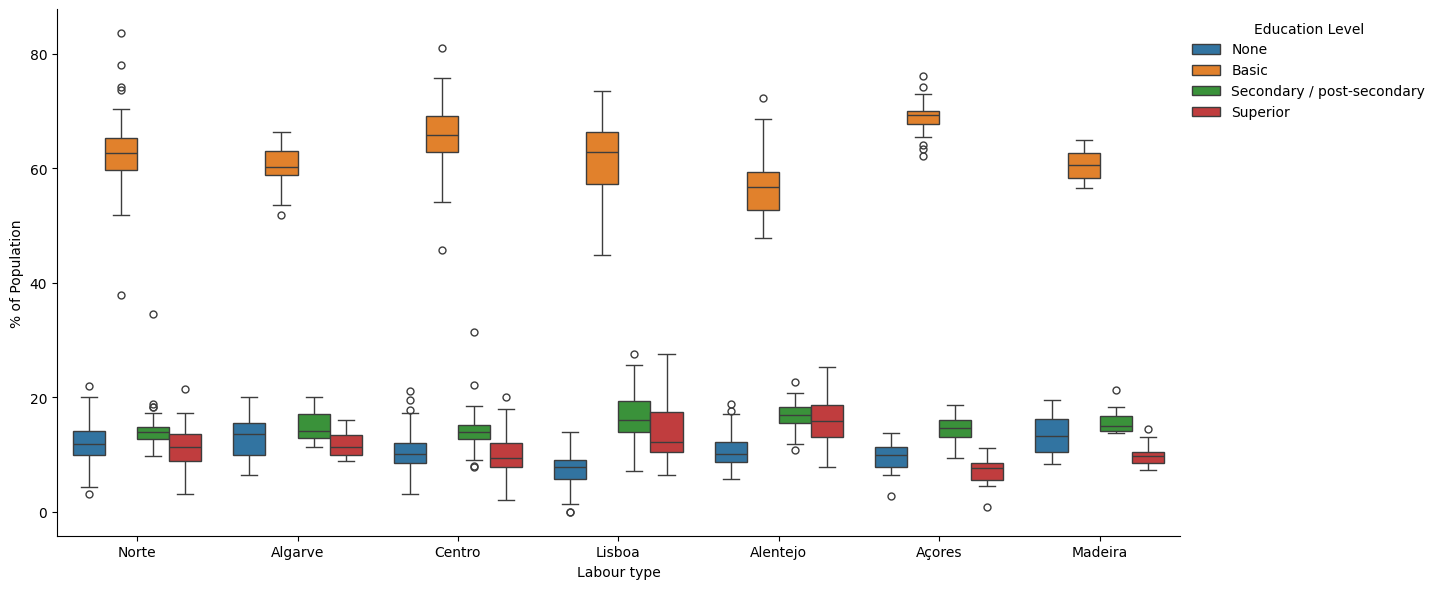

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the boxplot catplot plot
plot = sns.catplot(
    data=education_NUTS4_df_no_totals, # Use DataFrame labour_NUTS4_df
    x="region_name_nuts2", # Variable on x-axis: region_name_nuts2
    y="ed_level_perc", # Variable on y-axis: percentage
    hue="el.education_level", # Variable to separate by color: ltn.type_labour
    kind="box", # Chart type: boxplot
    height=6, # Height of the figure
    aspect=2, # Aspect ratio
    legend_out=False # Disable legend outside the plot
)

# Add labels to axes
plt.xlabel('Labour type') # Label the x-axis
plt.ylabel('% of Population') # y-axis label

# Adjust the position of the legend outside the chart
plt.legend(title='Education Level', bbox_to_anchor=(1.0, 1), loc='upper left', frameon=False)

# Show the chart
plt.show()

### Compare the relation between education and labour 

In [191]:
education_NUTS4_df = pd.read_csv('../CSVs/Education_NUTS4_2019.csv', sep=",")
education_NUTS4_df.fillna('None', inplace=True)

In [192]:
# Calculate the percentage of each level education type within each region
total_education_per_region_nuts4 = education_NUTS4_df.groupby('region_name')['e.value'].transform('sum')
education_NUTS4_df['percentage'] = (education_NUTS4_df['e.value'] / total_education_per_region_nuts4) * 100
education_NUTS4_df_filtered = education_NUTS4_df[education_NUTS4_df['el.education_level'] == 'Basic']
education_NUTS4_df_filtered.head(320)

NutsID        region_name  NUTS_level  e.year  e.value  \
616  1111601  Arcos de Valdevez           4    2019     2773   
617  1111602            Caminha           4    2019      628   
618  1111603            Melgaço           4    2019     1396   
619  1111604             Monção           4    2019     2612   
620  1111605   Paredes de Coura           4    2019     1304   
..       ...                ...         ...     ...      ...   
919  3003107      Ribeira Brava           4    2019     2152   
920  3003108         Santa Cruz           4    2019     2243   
921  3003109            Santana           4    2019     2249   
922  3003110        São Vicente           4    2019     1558   
923  3003201        Porto Santo           4    2019      208   

    el.education_level  percentage  
616              Basic   30.729167  
617              Basic   32.438017  
618              Basic   29.576271  
619              Basic   30.085234  
620              Basic   32.681704  
..                 ...         ...  
919              Basic   29.864002  
920              Basic   29.451155  
921              Basic   28.959567  
922              Basic   28.296404  
923              Basic   32.500000  

[308 rows x 7 columns]

In [193]:
labour_NUTS4_df = pd.read_csv('../CSVs/Labour_NUTS4_2019.csv', sep=",")
labour_NUTS4_df.head(3000)

NutsID        region_name  NUTS_level  l.year  l.value  \
0     1111601  Arcos de Valdevez           4    2019     2087   
1     1111601  Arcos de Valdevez           4    2019     1935   
2     1111601  Arcos de Valdevez           4    2019     1046   
3     1111601  Arcos de Valdevez           4    2019      626   
4     1111601  Arcos de Valdevez           4    2019      263   
...       ...                ...         ...     ...      ...   
2767  3003201        Porto Santo           4    2019       15   
2768  3003201        Porto Santo           4    2019       21   
2769  3003201        Porto Santo           4    2019       17   
2770  3003201        Porto Santo           4    2019        4   
2771  3003201        Porto Santo           4    2019        0   

                        ltn.type_labour  
0     Total labour force in agriculture  
1                   Family labour force  
2                                Holder  
3                                Spouse  
4                  Other family members  
...                                 ...  
2767               Other family members  
2768            Non-family labour force  
2769                            Regular  
2770                        Non-regular  
2771    Workers not hired by the holder  

[2772 rows x 6 columns]

In [194]:
# Definir el mapeo de NutsID a nombres de región
nuts_to_region = {
    '11': 'Norte',
    '15': 'Algarve',
    '16': 'Centro',
    '17': 'Lisboa',
    '18': 'Alentejo',
    '20': 'Açores',
    '30': 'Madeira'
}

# Crear una función para extraer los nombres de región de los códigos NutsID
def get_region_name(nutsid):
    # Extraer los primeros 3 caracteres del NutsID para el mapeo
    prefix = nutsid[:2]
    # Devolver el nombre de la región correspondiente
    return nuts_to_region.get(prefix, 'Unknown')

# Añadir una nueva columna al DataFrame con los nombres de región
labour_NUTS4_df['region_name_nuts2'] = labour_NUTS4_df['NutsID'].apply(get_region_name)

# Imprimir las primeras filas del DataFrame resultante
labour_NUTS4_df.head(10)

NutsID        region_name  NUTS_level  l.year  l.value  \
0  1111601  Arcos de Valdevez           4    2019     2087   
1  1111601  Arcos de Valdevez           4    2019     1935   
2  1111601  Arcos de Valdevez           4    2019     1046   
3  1111601  Arcos de Valdevez           4    2019      626   
4  1111601  Arcos de Valdevez           4    2019      263   
5  1111601  Arcos de Valdevez           4    2019      152   
6  1111601  Arcos de Valdevez           4    2019       75   
7  1111601  Arcos de Valdevez           4    2019       65   
8  1111601  Arcos de Valdevez           4    2019       11   
9  1111602            Caminha           4    2019      407   

                     ltn.type_labour region_name_nuts2  
0  Total labour force in agriculture             Norte  
1                Family labour force             Norte  
2                             Holder             Norte  
3                             Spouse             Norte  
4               Other family members             Norte  
5            Non-family labour force             Norte  
6                            Regular             Norte  
7                        Non-regular             Norte  
8    Workers not hired by the holder             Norte  
9  Total labour force in agriculture             Norte

In [195]:
lab_no_totals = labour_NUTS4_df[labour_NUTS4_df['ltn.type_labour'] != 'Total labour force in agriculture'].copy()
lab_totals =labour_NUTS4_df[(labour_NUTS4_df['ltn.type_labour'] == 'Family labour force') |
                        (labour_NUTS4_df['ltn.type_labour'] == 'Non-family labour force')].copy()
lab_split_totals = labour_NUTS4_df[(labour_NUTS4_df['ltn.type_labour'] != 'Total labour force in agriculture') & 
                              (labour_NUTS4_df['ltn.type_labour'] != 'Family labour force') &
                              (labour_NUTS4_df['ltn.type_labour'] != 'Non-family labour force')].copy()

In [196]:
lab_totals = lab_totals.groupby(['NutsID', 'region_name', 'region_name_nuts2'])['l.value'].sum().reset_index()
lab_split_totals = lab_split_totals.groupby(['NutsID', 'region_name', 'region_name_nuts2'])['l.value'].sum().reset_index()

In [197]:
def lab_percentage(row):
    id = row['NutsID']
    value = row['l.value']
    
    if row['ltn.type_labour'] in ['Family labour force', 'Non-family labour force']:
        total_row = lab_totals[lab_totals['NutsID'] == id]
    else:
        total_row = lab_split_totals[lab_split_totals['NutsID'] == id]
        
    if not total_row.empty:
        total = total_row['l.value'].values[0]
    else:
        return None
    if total == 0:
        return None
    else:
        return round((value / total) * 100, 2)

In [198]:
# Calculate the percentage of each labor type within each region
labour_NUTS4_df['percentage'] = lab_no_totals.apply(lab_percentage, axis=1)
labour_NUTS4_df.head(10)

NutsID        region_name  NUTS_level  l.year  l.value  \
0  1111601  Arcos de Valdevez           4    2019     2087   
1  1111601  Arcos de Valdevez           4    2019     1935   
2  1111601  Arcos de Valdevez           4    2019     1046   
3  1111601  Arcos de Valdevez           4    2019      626   
4  1111601  Arcos de Valdevez           4    2019      263   
5  1111601  Arcos de Valdevez           4    2019      152   
6  1111601  Arcos de Valdevez           4    2019       75   
7  1111601  Arcos de Valdevez           4    2019       65   
8  1111601  Arcos de Valdevez           4    2019       11   
9  1111602            Caminha           4    2019      407   

                     ltn.type_labour region_name_nuts2  percentage  
0  Total labour force in agriculture             Norte         NaN  
1                Family labour force             Norte       92.72  
2                             Holder             Norte       50.14  
3                             Spouse             Norte       30.01  
4               Other family members             Norte       12.61  
5            Non-family labour force             Norte        7.28  
6                            Regular             Norte        3.60  
7                        Non-regular             Norte        3.12  
8    Workers not hired by the holder             Norte        0.53  
9  Total labour force in agriculture             Norte         NaN

In [199]:
# Estos son todos los niveles de educación: ['None', 'Basic', 'Secondary / post-secondary' ,'Superior']

education_NUTS4_df_filtered = education_NUTS4_df[education_NUTS4_df['el.education_level'] == 'Basic'] 

# Estas tambien son variables: de labour_NUTS4_df_filtered 'Total labour force in agriculture', 'Family labour force', 'Holder', 'Spouse' ,'Other family members' ,'Non-family labour force' ,'Regular', 'Non-regular', 'Workers not hired by the holder']

labour_NUTS4_df_filtered = labour_NUTS4_df[labour_NUTS4_df['ltn.type_labour'] == 'Total labour force in agriculture']




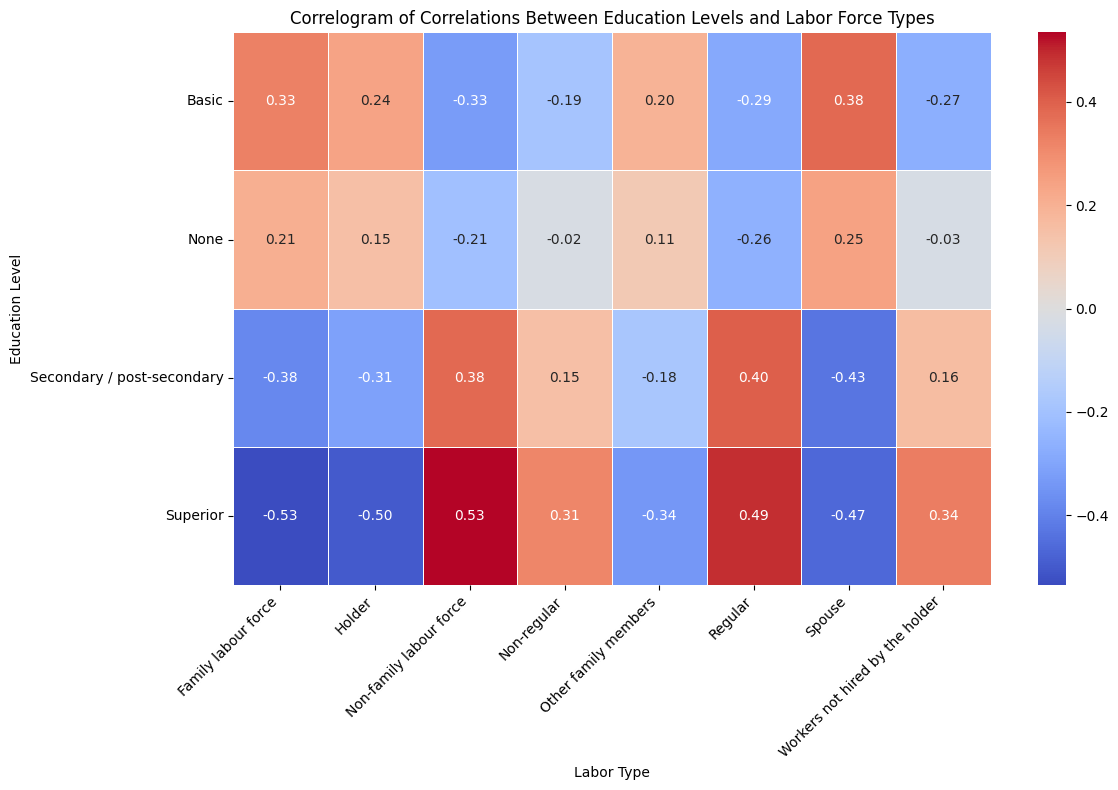

In [200]:
import pandas as pd


# Definir los niveles de educación y tipos de fuerza laboral de interés
niveles_educacion = ['None', 'Basic', 'Secondary / post-secondary', 'Superior']
tipos_labor = ['Family labour force', 'Holder', 'Spouse',
               'Other family members', 'Non-family labour force', 'Regular', 'Non-regular',
               'Workers not hired by the holder']

# Lista para almacenar los resultados de correlación
correlation_results = []

# Iterar sobre cada nivel de educación y tipo de fuerza laboral
for nivel_educacion in niveles_educacion:
    for tipo_labor in tipos_labor:
        # Filtrar los dataframes por nivel de educación y tipo de fuerza laboral
        df_educacion_filtrado = education_NUTS4_df[education_NUTS4_df['el.education_level'] == nivel_educacion]
        df_labor_filtrado = labour_NUTS4_df[labour_NUTS4_df['ltn.type_labour'] == tipo_labor]
        
        # Combinar los dataframes filtrados usando merge
        df_combinado = pd.merge(df_educacion_filtrado, df_labor_filtrado, on='region_name', how='inner')
        
        # print(df_combinado.head()) 
        
        
        # Calcular la correlación entre las columnas relevantes
        correlacion = df_combinado['percentage_x'].corr(df_combinado['percentage_y'])
        
        # Almacenar los resultados de correlación junto con los nombres de nivel de educación y tipo de labor
        correlation_results.append({
            'Education Level': nivel_educacion,
            'Labor Type': tipo_labor,
            'Correlation': correlacion
        })

# Crear un dataframe a partir de la lista de resultados de correlación
df_correlation= pd.DataFrame(correlation_results)

# Mostrar los resultados de correlación
df_correlation.head(31)

# Generate a correlogram
plt.figure(figsize=(12, 8))
correlation_matrix = df_correlation.pivot(index="Education Level", columns="Labor Type", values="Correlation")
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=.5, fmt=".2f")
plt.title('Correlogram of Correlations Between Education Levels and Labor Force Types')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [215]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# Define education levels and types of labor force of interest
niveles_educacion = ['None', 'Basic', 'Secondary / post-secondary', 'Superior']
tipos_labor = ['Family labour force', 'Holder', 'Spouse',
               'Other family members', 'Non-family labour force', 'Regular', 'Non-regular',
               'Workers not hired by the holder']

# List to store the results
regression_results = []

combined_dataframes = []  # List to store combined dataframes

# Iterate on each level of education and type of workforce.
for nivel_educacion in niveles_educacion:
    for tipo_labor in tipos_labor:
        # Filter dataframes by education level and type of workforce
        df_educacion_filtrado = education_NUTS4_df[education_NUTS4_df['el.education_level'] == nivel_educacion]
        df_labor_filtrado = labour_NUTS4_df[labour_NUTS4_df['ltn.type_labour'] == tipo_labor]
        
        # Combinar los dataframes filtrados usando merge
        df_combinado = pd.merge(df_educacion_filtrado, df_labor_filtrado, on='region_name', how='inner')
        
        # Append combined dataframe to the list
        combined_dataframes.append(df_combinado)
        
        # Asegurarse de que haya suficientes datos para realizar el análisis
        if len(df_combinado) > 1:
            # Ajustar el modelo de regresión lineal y calcular R²
            X = df_combinado['percentage_x'].values.reshape(-1, 1)
            y = df_combinado['percentage_y'].values
            model = LinearRegression().fit(X, y)
            r2 = model.score(X, y)
            
            # Almacenar los resultados en la lista
            regression_results.append({
                'Education Level': nivel_educacion,
                'Type of Labor': tipo_labor,
                'R²': r2
            })
            
            
 
df_combinado_total = pd.concat(combined_dataframes, ignore_index=True)        

# Create a dataframe from the regression results list
df_regression_results = pd.DataFrame(regression_results)

# Display regression results
df_regression_results.head(31)



Education Level                    Type of Labor        R²
0                         None              Family labour force  0.042349
1                         None                           Holder  0.023549
2                         None                           Spouse  0.060152
3                         None             Other family members  0.013043
4                         None          Non-family labour force  0.042349
5                         None                          Regular  0.068501
6                         None                      Non-regular  0.000511
7                         None  Workers not hired by the holder  0.000690
8                        Basic              Family labour force  0.107407
9                        Basic                           Holder  0.058487
10                       Basic                           Spouse  0.147384
11                       Basic             Other family members  0.038413
12                       Basic          Non-family labour force  0.107407
13                       Basic                          Regular  0.081327
14                       Basic                      Non-regular  0.036680
15                       Basic  Workers not hired by the holder  0.072432
16  Secondary / post-secondary              Family labour force  0.146326
17  Secondary / post-secondary                           Holder  0.097668
18  Secondary / post-secondary                           Spouse  0.187363
19  Secondary / post-secondary             Other family members  0.032766
20  Secondary / post-secondary          Non-family labour force  0.146326
21  Secondary / post-secondary                          Regular  0.163603
22  Secondary / post-secondary                      Non-regular  0.023306
23  Secondary / post-secondary  Workers not hired by the holder  0.026264
24                    Superior              Family labour force  0.285982
25                    Superior                           Holder  0.251098
26                    Superior                           Spouse  0.216489
27                    Superior             Other family members  0.116289
28                    Superior          Non-family labour force  0.285982
29                    Superior                          Regular  0.242139
30                    Superior                      Non-regular  0.099101

In [216]:
df_combinado_total.head()

NutsID_x        region_name  NUTS_level_x  e.year  e.value  \
0  1111601  Arcos de Valdevez             4    2019      902   
1  1111602            Caminha             4    2019      141   
2  1111603            Melgaço             4    2019      346   
3  1111604             Monção             4    2019      616   
4  1111605   Paredes de Coura             4    2019      323   

  el.education_level  percentage_x NutsID_y  NUTS_level_y  l.year  l.value  \
0               None      9.995567  1111601             4    2019     1935   
1               None      7.283058  1111602             4    2019      326   
2               None      7.330508  1111603             4    2019      878   
3               None      7.095139  1111604             4    2019     1744   
4               None      8.095238  1111605             4    2019      709   

       ltn.type_labour region_name_nuts2  percentage_y  
0  Family labour force             Norte         92.72  
1  Family labour force             Norte         80.10  
2  Family labour force             Norte         89.68  
3  Family labour force             Norte         87.86  
4  Family labour force             Norte         94.16

In [219]:
# Filtrar df_regression_results
df_regression_results_filter = df_regression_results[(df_regression_results['Type of Labor'] == 'Family labour force') & 
                                                     (df_regression_results['Education Level'] == 'Superior')]

# Filtrar df_combinado
df_combinado_2 = df_combinado_total[(df_combinado_total['ltn.type_labour'] == 'Family labour force') & 
                              (df_combinado_total['el.education_level'] == 'Superior')]

# Calcular R² y ajustar modelo de regresión
X = df_combinado_2['percentage_x'].values.reshape(-1, 1)
y = df_combinado_2['percentage_y'].values
model = LinearRegression().fit(X, y)
r2 = model.score(X, y)

df_combinado_2.head()



NutsID_x        region_name  NUTS_level_x  e.year  e.value  \
7488  1111601  Arcos de Valdevez             4    2019      286   
7489  1111602            Caminha             4    2019       85   
7490  1111603            Melgaço             4    2019      261   
7491  1111604             Monção             4    2019      447   
7492  1111605   Paredes de Coura             4    2019      108   

     el.education_level  percentage_x NutsID_y  NUTS_level_y  l.year  l.value  \
7488           Superior      3.169326  1111601             4    2019     1935   
7489           Superior      4.390496  1111602             4    2019      326   
7490           Superior      5.529661  1111603             4    2019      878   
7491           Superior      5.148583  1111604             4    2019     1744   
7492           Superior      2.706767  1111605             4    2019      709   

          ltn.type_labour region_name_nuts2  percentage_y  
7488  Family labour force             Norte         92.72  
7489  Family labour force             Norte         80.10  
7490  Family labour force             Norte         89.68  
7491  Family labour force             Norte         87.86  
7492  Family labour force             Norte         94.16

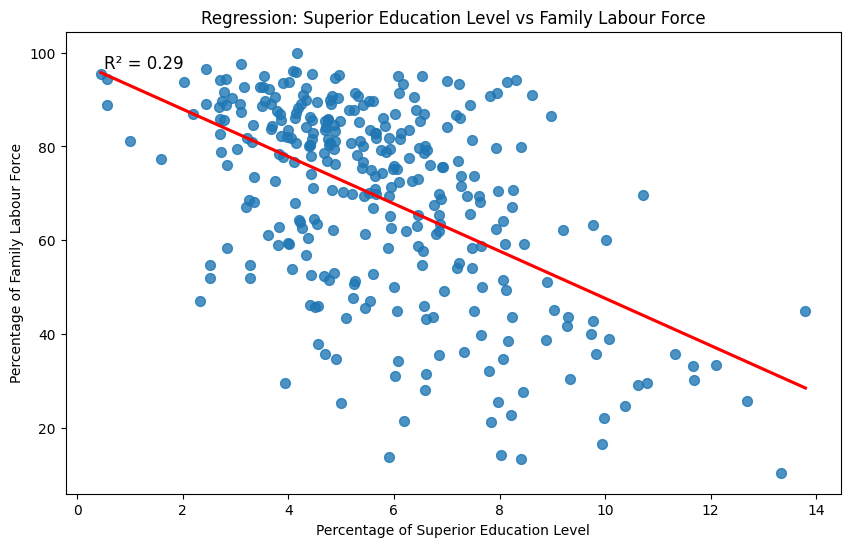

In [220]:
# Crear el scatter plot con línea de regresión
plt.figure(figsize=(10, 6))
sns.regplot(x='percentage_x', y='percentage_y', data=df_combinado_2, ci=None, scatter_kws={'s':50}, line_kws={'color':'red'})
            
# Añadir R² al gráfico
plt.text(0.05, 0.95, f'R² = {r2:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
            
# Añadir títulos y etiquetas
plt.title(f'Regression: Superior Education Level vs Family Labour Force')
plt.xlabel(f'Percentage of Superior Education Level')
plt.ylabel(f'Percentage of Family Labour Force')
plt.grid(False)

plt.show()


## 3. Analysis for NUTS5

### View data tendencies by region in Labour data

In [107]:
labour_NUTS5_df = pd.read_csv('../CSVs/Labour_NUTS5_2019.csv', sep=",")
labour_NUTS5_df.head(4000)

NutsID       region_name  NUTS_level  l.year  l.value  \
0     111160101  Aboim das Choças           5    2019       35   
1     111160101  Aboim das Choças           5    2019       34   
2     111160101  Aboim das Choças           5    2019       15   
3     111160101  Aboim das Choças           5    2019       13   
4     111160101  Aboim das Choças           5    2019        6   
...         ...               ...         ...     ...      ...   
3995  119030866         Serzedelo           5    2019        0   
3996  119030868          Silvares           5    2019       41   
3997  119030868          Silvares           5    2019       34   
3998  119030868          Silvares           5    2019       17   
3999  119030868          Silvares           5    2019       10   

                        ltn.type_labour  
0     Total labour force in agriculture  
1                   Family labour force  
2                                Holder  
3                                Spouse  
4                  Other family members  
...                                 ...  
3995    Workers not hired by the holder  
3996  Total labour force in agriculture  
3997                Family labour force  
3998                             Holder  
3999                             Spouse  

[4000 rows x 6 columns]

In [109]:
# Create a list of the region_name

labour_NUTS5_df_list = labour_NUTS5_df['region_name'].unique().tolist()
#print(labour_NUTS5_df_list)

print(len(labour_NUTS5_df_list))

2874


In [110]:
# Definir el mapeo de NutsID a nombres de región
nuts_to_region = {
    '11': 'Norte',
    '15': 'Algarve',
    '16': 'Centro',
    '17': 'Lisboa',
    '18': 'Alentejo',
    '20': 'Açores',
    '30': 'Madeira'
}

# Crear una función para extraer los nombres de región de los códigos NutsID
def get_region_name(nutsid):
    # Extraer los primeros 3 caracteres del NutsID para el mapeo
    prefix = nutsid[:2]
    # Devolver el nombre de la región correspondiente
    return nuts_to_region.get(prefix, 'Unknown')

# Añadir una nueva columna al DataFrame con los nombres de región
labour_NUTS5_df['region_name_nuts2'] = labour_NUTS5_df['NutsID'].apply(get_region_name)

# Imprimir las primeras filas del DataFrame resultante
labour_NUTS5_df.head(10)


NutsID       region_name  NUTS_level  l.year  l.value  \
0  111160101  Aboim das Choças           5    2019       35   
1  111160101  Aboim das Choças           5    2019       34   
2  111160101  Aboim das Choças           5    2019       15   
3  111160101  Aboim das Choças           5    2019       13   
4  111160101  Aboim das Choças           5    2019        6   
5  111160101  Aboim das Choças           5    2019        2   
6  111160101  Aboim das Choças           5    2019        1   
7  111160101  Aboim das Choças           5    2019        0   
8  111160101  Aboim das Choças           5    2019        0   
9  111160102             Aguiã           5    2019       72   

                     ltn.type_labour region_name_nuts2  
0  Total labour force in agriculture             Norte  
1                Family labour force             Norte  
2                             Holder             Norte  
3                             Spouse             Norte  
4               Other family members             Norte  
5            Non-family labour force             Norte  
6                            Regular             Norte  
7                        Non-regular             Norte  
8    Workers not hired by the holder             Norte  
9  Total labour force in agriculture             Norte

In [111]:
lab_no_totals = labour_NUTS5_df[labour_NUTS5_df['ltn.type_labour'] != 'Total labour force in agriculture'].copy()
lab_totals =labour_NUTS5_df[(labour_NUTS5_df['ltn.type_labour'] == 'Family labour force') |
                        (labour_NUTS5_df['ltn.type_labour'] == 'Non-family labour force')].copy()
lab_split_totals = labour_NUTS5_df[(labour_NUTS5_df['ltn.type_labour'] != 'Total labour force in agriculture') & 
                              (labour_NUTS5_df['ltn.type_labour'] != 'Family labour force') &
                              (labour_NUTS5_df['ltn.type_labour'] != 'Non-family labour force')].copy()

In [112]:
lab_totals = lab_totals.groupby(['NutsID', 'region_name', 'region_name_nuts2'])['l.value'].sum().reset_index()
lab_split_totals = lab_split_totals.groupby(['NutsID', 'region_name', 'region_name_nuts2'])['l.value'].sum().reset_index()

In [105]:
def lab_percentage(row):
    id = row['NutsID']
    value = row['l.value']
    
    if row['ltn.type_labour'] in ['Family labour force', 'Non-family labour force']:
        total_row = lab_totals[lab_totals['NutsID'] == id]
    else:
        total_row = lab_split_totals[lab_split_totals['NutsID'] == id]
        
    if not total_row.empty:
        total = total_row['l.value'].values[0]
    else:
        return None
    if total == 0:
        return None
    else:
        return round((value / total) * 100, 2)

In [114]:
# Calculate the percentage of each labor type within each region
labour_NUTS5_df['percentage'] = lab_no_totals.apply(lab_percentage, axis=1)
labour_NUTS5_df = labour_NUTS5_df[labour_NUTS5_df['ltn.type_labour'] != 'Total labour force in agriculture'].copy()
labour_NUTS5_df.head(10)

NutsID       region_name  NUTS_level  l.year  l.value  \
1   111160101  Aboim das Choças           5    2019       34   
2   111160101  Aboim das Choças           5    2019       15   
3   111160101  Aboim das Choças           5    2019       13   
4   111160101  Aboim das Choças           5    2019        6   
5   111160101  Aboim das Choças           5    2019        2   
6   111160101  Aboim das Choças           5    2019        1   
7   111160101  Aboim das Choças           5    2019        0   
8   111160101  Aboim das Choças           5    2019        0   
10  111160102             Aguiã           5    2019       70   
11  111160102             Aguiã           5    2019       38   

                    ltn.type_labour region_name_nuts2  percentage  
1               Family labour force             Norte       94.44  
2                            Holder             Norte       42.86  
3                            Spouse             Norte       37.14  
4              Other family members             Norte       17.14  
5           Non-family labour force             Norte        5.56  
6                           Regular             Norte        2.86  
7                       Non-regular             Norte        0.00  
8   Workers not hired by the holder             Norte        0.00  
10              Family labour force             Norte       95.89  
11                           Holder             Norte       52.78

c:\Users\cespe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._figure.tight_layout(*args, **kwargs)


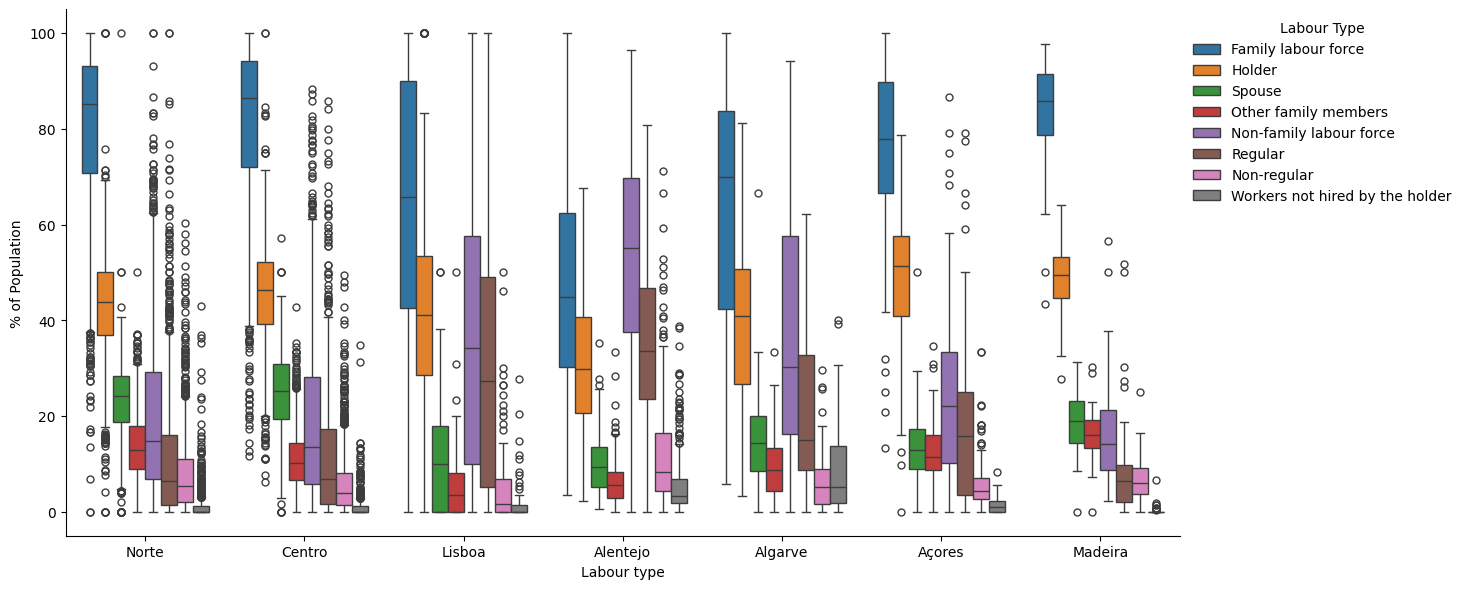

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the boxplot catplot plot
plot = sns.catplot(
    data=labour_NUTS5_df, # Use DataFrame labour_NUTS4_df
    x="region_name_nuts2", # Variable on x-axis: region_name_nuts2
    y="percentage", # Variable on y-axis: percentage
    hue="ltn.type_labour", # Variable to separate by color: ltn.type_labour
    kind="box", # Chart type: boxplot
    height=6, # Height of the figure
    aspect=2, # Aspect ratio
    legend_out=False # Disable legend outside the plot
)

# Add labels to axes
plt.xlabel('Labour type') # Label the x-axis
plt.ylabel('% of Population') # y-axis label

# Adjust the position of the legend outside the chart
plt.legend(title='Labour Type', bbox_to_anchor=(1.0, 1), loc='upper left', frameon=False)

# Show the chart
plt.show()


### View data tendencies by region in education data

In [116]:
education_NUTS5_df = pd.read_csv('../CSVs/Education_NUTS5_2019.csv', sep=",")
education_NUTS5_df.fillna('None', inplace=True)
education_NUTS5_df.head(3000)

NutsID                                        region_name  \
0     111160101                                   Aboim das Choças   
1     111160102                                              Aguiã   
2     111160104                                              Ázere   
3     111160105                                       Cabana Maior   
4     111160106                                           Cabreiro   
...         ...                                                ...   
2995  11A131308                                            Laundos   
2996  11A131311                                              Rates   
2997  11A131313  União das freguesias de Aver-o-Mar, Amorim e T...   
2998  11A131314        União das freguesias de Aguçadoura e Navais   
2999  11A131315  União das freguesias da Póvoa de Varzim, Beiri...   

      NUTS_level  e.year  e.value          el.education_level  
0              5    2019       94                       Total  
1              5    2019       99                       Total  
2              5    2019       68                       Total  
3              5    2019       63                       Total  
4              5    2019      204                       Total  
...          ...     ...      ...                         ...  
2995           5    2019       12  Secondary / post-secondary  
2996           5    2019       21  Secondary / post-secondary  
2997           5    2019       45  Secondary / post-secondary  
2998           5    2019       68  Secondary / post-secondary  
2999           5    2019       10  Secondary / post-secondary  

[3000 rows x 6 columns]

In [117]:
# Definir el mapeo de NutsID a nombres de región
nuts_to_region = {
    '11': 'Norte',
    '15': 'Algarve',
    '16': 'Centro',
    '17': 'Lisboa',
    '18': 'Alentejo',
    '20': 'Açores',
    '30': 'Madeira'
}

# Crear una función para extraer los nombres de región de los códigos NutsID
def get_region_name(nutsid):
    # Extraer los primeros 3 caracteres del NutsID para el mapeo
    prefix = nutsid[:2]
    # Devolver el nombre de la región correspondiente
    return nuts_to_region.get(prefix, 'Unknown')

# Añadir una nueva columna al DataFrame con los nombres de región
education_NUTS5_df['region_name_nuts2'] = education_NUTS5_df['NutsID'].apply(get_region_name)

# Imprimir las primeras filas del DataFrame resultante
education_NUTS5_df.head(309)

NutsID                                        region_name  NUTS_level  \
0    111160101                                   Aboim das Choças           5   
1    111160102                                              Aguiã           5   
2    111160104                                              Ázere           5   
3    111160105                                       Cabana Maior           5   
4    111160106                                           Cabreiro           5   
..         ...                                                ...         ...   
304  112030364  União das freguesias de Braga (Maximinos, Sé e...           5   
305  112030365  União das freguesias de Braga (São José de São...           5   
306  112030366  União das freguesias de Cabreiros e Passos (Sã...           5   
307  112030367  União das freguesias de Celeirós, Aveleda e Vi...           5   
308  112030368          União das freguesias de Crespos e Pousada           5   

     e.year  e.value el.education_level region_name_nuts2  
0      2019       94              Total             Norte  
1      2019       99              Total             Norte  
2      2019       68              Total             Norte  
3      2019       63              Total             Norte  
4      2019      204              Total             Norte  
..      ...      ...                ...               ...  
304    2019       12              Total             Norte  
305    2019        0              Total             Norte  
306    2019      247              Total             Norte  
307    2019      176              Total             Norte  
308    2019      132              Total             Norte  

[309 rows x 7 columns]

In [118]:
# Define the function to calculate education percentage
def ed_percentage(row, total_values):
    id = row['NutsID']
    value = row['e.value']
    total = total_values.get(id, 0)
    if total == 0:
        return 0
    else:
        return (value / total) * 100 if total != 0 else 0

# Get the total education values for each NutsID where education_level is 'Total'
total_values = education_NUTS5_df[education_NUTS5_df['el.education_level'] == 'Total'].set_index('NutsID')['e.value'].to_dict()

# Filter out rows where education_level is not 'Total'
education_NUTS5_df_no_totals = education_NUTS5_df[education_NUTS5_df['el.education_level'] != 'Total'].copy()

# Apply the ed_percentage function to calculate percentages
education_NUTS5_df_no_totals['ed_level_perc'] = education_NUTS5_df_no_totals.apply(lambda row: ed_percentage(row, total_values), axis=1)

# Display the dataframe
education_NUTS5_df_no_totals.head()

NutsID       region_name  NUTS_level  e.year  e.value  \
780  111160101  Aboim das Choças           5    2019       15   
781  111160102             Aguiã           5    2019       24   
782  111160104             Ázere           5    2019        3   
783  111160105      Cabana Maior           5    2019       24   
784  111160106          Cabreiro           5    2019       66   

    el.education_level region_name_nuts2  ed_level_perc  
780               None             Norte      15.957447  
781               None             Norte      24.242424  
782               None             Norte       4.411765  
783               None             Norte      38.095238  
784               None             Norte      32.352941

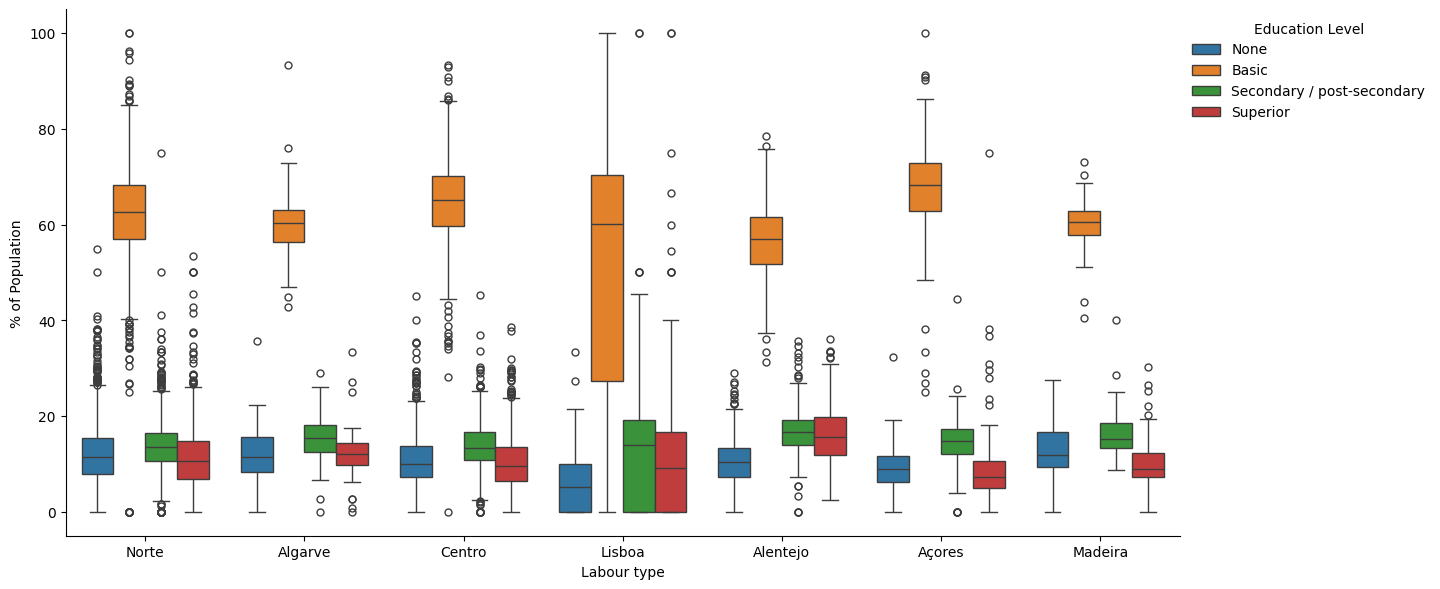

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the boxplot catplot plot
plot = sns.catplot(
    data=education_NUTS5_df_no_totals, # Use DataFrame labour_NUTS4_df
    x="region_name_nuts2", # Variable on x-axis: region_name_nuts2
    y="ed_level_perc", # Variable on y-axis: percentage
    hue="el.education_level", # Variable to separate by color: ltn.type_labour
    kind="box", # Chart type: boxplot
    height=6, # Height of the figure
    aspect=2, # Aspect ratio
    legend_out=False # Disable legend outside the plot
)

# Add labels to axes
plt.xlabel('Labour type') # Label the x-axis
plt.ylabel('% of Population') # y-axis label

# Adjust the position of the legend outside the chart
plt.legend(title='Education Level', bbox_to_anchor=(1.0, 1), loc='upper left', frameon=False)

# Show the chart
plt.show()

### Compare the relation between education and labour 

In [797]:
### Compare the relation between education and labour 
education_NUTS5_df = pd.read_csv('../CSVs/Education_NUTS5_2019.csv', sep=",")
education_NUTS5_df.fillna('None', inplace=True)

In [120]:
# Calculate the percentage of each level education type within each region
total_education_per_region_nuts5 = education_NUTS5_df.groupby('region_name')['e.value'].transform('sum')
education_NUTS5_df['percentage'] = (education_NUTS5_df['e.value'] / total_education_per_region_nuts5) * 100
education_NUTS5_df_filtered = education_NUTS5_df[education_NUTS5_df['el.education_level'] == 'Basic']
education_NUTS5_df_filtered.head(320)


NutsID                                        region_name  \
1560  111160101                                   Aboim das Choças   
1561  111160102                                              Aguiã   
1562  111160104                                              Ázere   
1563  111160105                                       Cabana Maior   
1564  111160106                                           Cabreiro   
...         ...                                                ...   
1875  112030375  União das freguesias de Merelim (São Pedro) e ...   
1876  112030376      União das freguesias de Morreira e Trandeiras   
1877  112030377  União das freguesias de Nogueira, Fraião e Lam...   
1878  112030378          União das freguesias de Nogueiró e Tenões   
1879  112030379       União das freguesias de Real, Dume e Semelhe   

      NUTS_level  e.year  e.value el.education_level region_name_nuts2  \
1560           5    2019       61              Basic             Norte   
1561           5    2019       68              Basic             Norte   
1562           5    2019       48              Basic             Norte   
1563           5    2019       34              Basic             Norte   
1564           5    2019      107              Basic             Norte   
...          ...     ...      ...                ...               ...   
1875           5    2019       92              Basic             Norte   
1876           5    2019       96              Basic             Norte   
1877           5    2019       45              Basic             Norte   
1878           5    2019       22              Basic             Norte   
1879           5    2019      103              Basic             Norte   

      percentage  
1560   32.446809  
1561   34.343434  
1562   35.294118  
1563   26.984127  
1564   26.225490  
...          ...  
1875   37.096774  
1876   32.432432  
1877   25.000000  
1878   32.352941  
1879   31.212121  

[320 rows x 8 columns]

In [121]:
labour_NUTS5_df = pd.read_csv('../CSVs/Labour_NUTS5_2019.csv', sep=",")
labour_NUTS5_df.head(3000)

NutsID       region_name  NUTS_level  l.year  l.value  \
0     111160101  Aboim das Choças           5    2019       35   
1     111160101  Aboim das Choças           5    2019       34   
2     111160101  Aboim das Choças           5    2019       15   
3     111160101  Aboim das Choças           5    2019       13   
4     111160101  Aboim das Choças           5    2019        6   
...         ...               ...         ...     ...      ...   
2995  112031003    Campo do Gerês           5    2019        0   
2996  112031003    Campo do Gerês           5    2019        0   
2997  112031004       Carvalheira           5    2019       77   
2998  112031004       Carvalheira           5    2019       74   
2999  112031004       Carvalheira           5    2019       35   

                        ltn.type_labour  
0     Total labour force in agriculture  
1                   Family labour force  
2                                Holder  
3                                Spouse  
4                  Other family members  
...                                 ...  
2995                        Non-regular  
2996    Workers not hired by the holder  
2997  Total labour force in agriculture  
2998                Family labour force  
2999                             Holder  

[3000 rows x 6 columns]

In [122]:
# Definir el mapeo de NutsID a nombres de región
nuts_to_region = {
    '11': 'Norte',
    '15': 'Algarve',
    '16': 'Centro',
    '17': 'Lisboa',
    '18': 'Alentejo',
    '20': 'Açores',
    '30': 'Madeira'
}

# Crear una función para extraer los nombres de región de los códigos NutsID
def get_region_name(nutsid):
    # Extraer los primeros 3 caracteres del NutsID para el mapeo
    prefix = nutsid[:2]
    # Devolver el nombre de la región correspondiente
    return nuts_to_region.get(prefix, 'Unknown')

# Añadir una nueva columna al DataFrame con los nombres de región
labour_NUTS5_df['region_name_nuts2'] = labour_NUTS5_df['NutsID'].apply(get_region_name)

# Imprimir las primeras filas del DataFrame resultante
labour_NUTS5_df.head(10)

NutsID       region_name  NUTS_level  l.year  l.value  \
0  111160101  Aboim das Choças           5    2019       35   
1  111160101  Aboim das Choças           5    2019       34   
2  111160101  Aboim das Choças           5    2019       15   
3  111160101  Aboim das Choças           5    2019       13   
4  111160101  Aboim das Choças           5    2019        6   
5  111160101  Aboim das Choças           5    2019        2   
6  111160101  Aboim das Choças           5    2019        1   
7  111160101  Aboim das Choças           5    2019        0   
8  111160101  Aboim das Choças           5    2019        0   
9  111160102             Aguiã           5    2019       72   

                     ltn.type_labour region_name_nuts2  
0  Total labour force in agriculture             Norte  
1                Family labour force             Norte  
2                             Holder             Norte  
3                             Spouse             Norte  
4               Other family members             Norte  
5            Non-family labour force             Norte  
6                            Regular             Norte  
7                        Non-regular             Norte  
8    Workers not hired by the holder             Norte  
9  Total labour force in agriculture             Norte

In [123]:
lab_no_totals = labour_NUTS5_df[labour_NUTS5_df['ltn.type_labour'] != 'Total labour force in agriculture'].copy()
lab_totals =labour_NUTS5_df[(labour_NUTS5_df['ltn.type_labour'] == 'Family labour force') |
                        (labour_NUTS5_df['ltn.type_labour'] == 'Non-family labour force')].copy()
lab_split_totals = labour_NUTS5_df[(labour_NUTS5_df['ltn.type_labour'] != 'Total labour force in agriculture') & 
                              (labour_NUTS5_df['ltn.type_labour'] != 'Family labour force') &
                              (labour_NUTS5_df['ltn.type_labour'] != 'Non-family labour force')].copy()

In [124]:
lab_totals = lab_totals.groupby(['NutsID', 'region_name', 'region_name_nuts2'])['l.value'].sum().reset_index()
lab_split_totals = lab_split_totals.groupby(['NutsID', 'region_name', 'region_name_nuts2'])['l.value'].sum().reset_index()

In [125]:
def lab_percentage(row):
    id = row['NutsID']
    value = row['l.value']
    
    if row['ltn.type_labour'] in ['Family labour force', 'Non-family labour force']:
        total_row = lab_totals[lab_totals['NutsID'] == id]
    else:
        total_row = lab_split_totals[lab_split_totals['NutsID'] == id]
        
    if not total_row.empty:
        total = total_row['l.value'].values[0]
    else:
        return None
    if total == 0:
        return None
    else:
        return round((value / total) * 100, 2)

In [126]:
# Calculate the percentage of each labor type within each region
labour_NUTS5_df['percentage'] = lab_no_totals.apply(lab_percentage, axis=1)
labour_NUTS5_df = labour_NUTS5_df[labour_NUTS5_df['ltn.type_labour'] != 'Total labour force in agriculture'].copy()
labour_NUTS5_df.head(10)

NutsID       region_name  NUTS_level  l.year  l.value  \
1   111160101  Aboim das Choças           5    2019       34   
2   111160101  Aboim das Choças           5    2019       15   
3   111160101  Aboim das Choças           5    2019       13   
4   111160101  Aboim das Choças           5    2019        6   
5   111160101  Aboim das Choças           5    2019        2   
6   111160101  Aboim das Choças           5    2019        1   
7   111160101  Aboim das Choças           5    2019        0   
8   111160101  Aboim das Choças           5    2019        0   
10  111160102             Aguiã           5    2019       70   
11  111160102             Aguiã           5    2019       38   

                    ltn.type_labour region_name_nuts2  percentage  
1               Family labour force             Norte       94.44  
2                            Holder             Norte       42.86  
3                            Spouse             Norte       37.14  
4              Other family members             Norte       17.14  
5           Non-family labour force             Norte        5.56  
6                           Regular             Norte        2.86  
7                       Non-regular             Norte        0.00  
8   Workers not hired by the holder             Norte        0.00  
10              Family labour force             Norte       95.89  
11                           Holder             Norte       52.78

In [801]:

# Estos son todos los niveles de educación: ['None', 'Basic', 'Secondary / post-secondary' ,'Superior']

education_NUTS5_df_filtered = education_NUTS5_df[education_NUTS5_df['el.education_level'] == 'Basic'] 

# Estas tambien son variables: de labour_NUTS4_df_filtered 'Total labour force in agriculture', 'Family labour force', 'Holder', 'Spouse' ,'Other family members' ,'Non-family labour force' ,'Regular', 'Non-regular', 'Workers not hired by the holder']

labour_NUTS5_df_filtered = labour_NUTS5_df[labour_NUTS5_df['ltn.type_labour'] == 'Total labour force in agriculture']



               Education Level                       Labor Type  Correlation
0                         None              Family labour force     0.081736
1                         None                           Holder     0.050981
2                         None                           Spouse     0.107996
3                         None             Other family members     0.007532
4                         None          Non-family labour force    -0.081736
5                         None                          Regular    -0.079649
6                         None                      Non-regular    -0.041025
7                         None  Workers not hired by the holder    -0.022560
8                        Basic              Family labour force     0.049815
9                        Basic                           Holder     0.059473
10                       Basic                           Spouse     0.078540
11                       Basic             Other family members    -0.070810

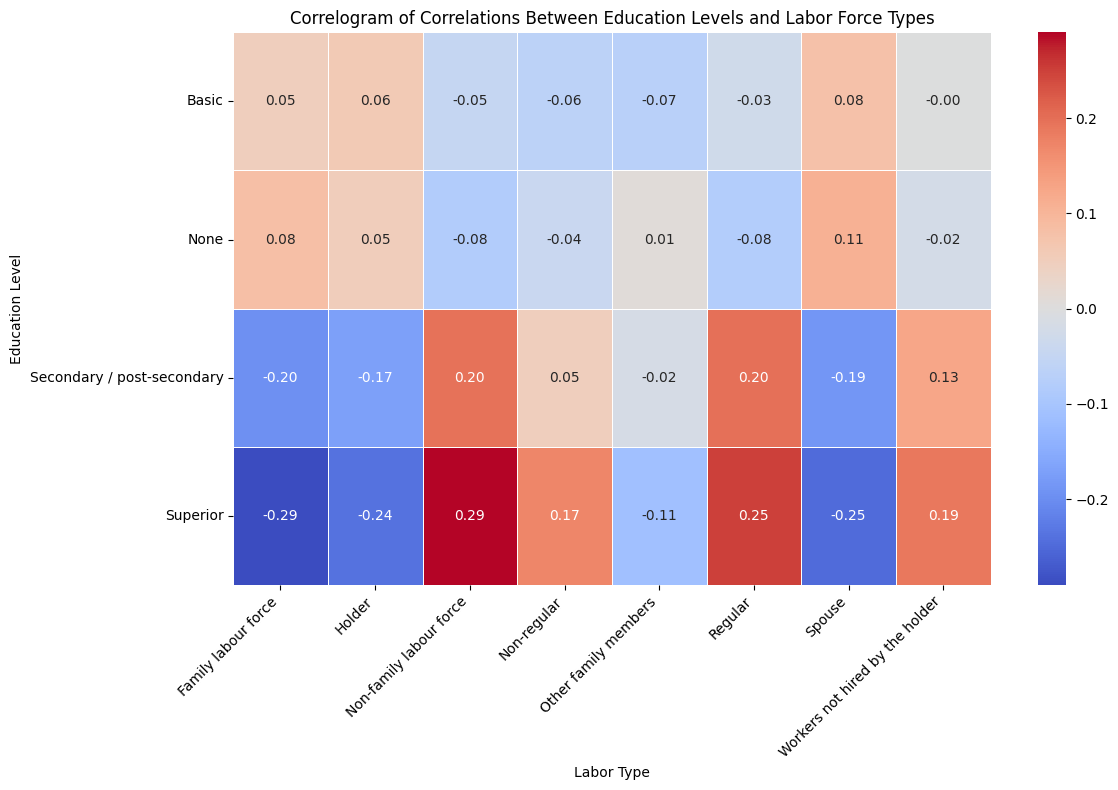

In [128]:



import pandas as pd

# Definir los niveles de educación y tipos de fuerza laboral de interés
niveles_educacion = ['None', 'Basic', 'Secondary / post-secondary', 'Superior']
tipos_labor = ['Family labour force', 'Holder', 'Spouse',
               'Other family members', 'Non-family labour force', 'Regular', 'Non-regular',
               'Workers not hired by the holder']

# Lista para almacenar los resultados de correlación
correlation_results = []

# Iterar sobre cada nivel de educación y tipo de fuerza laboral
for nivel_educacion in niveles_educacion:
    for tipo_labor in tipos_labor:
        # Filtrar los dataframes por nivel de educación y tipo de fuerza laboral
        df_educacion_filtrado = education_NUTS5_df[education_NUTS5_df['el.education_level'] == nivel_educacion]
        df_labor_filtrado = labour_NUTS5_df[labour_NUTS5_df['ltn.type_labour'] == tipo_labor]
        
        # Combinar los dataframes filtrados usando merge
        df_combinado = pd.merge(df_educacion_filtrado, df_labor_filtrado, on='region_name', how='inner')
        
        # print(df_combinado.head()) 
        
        
        # Calcular la correlación entre las columnas relevantes
        correlacion = df_combinado['percentage_x'].corr(df_combinado['percentage_y'])
        
        # Almacenar los resultados de correlación junto con los nombres de nivel de educación y tipo de labor
        correlation_results.append({
            'Education Level': nivel_educacion,
            'Labor Type': tipo_labor,
            'Correlation': correlacion
        })

# Crear un dataframe a partir de la lista de resultados de correlación
df_correlation= pd.DataFrame(correlation_results)

# Mostrar los resultados de correlación
print(df_correlation)

# Generate a correlogram
plt.figure(figsize=(12, 8))
correlation_matrix = df_correlation.pivot(index="Education Level", columns="Labor Type", values="Correlation")
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=.5, fmt=".2f")
plt.title('Correlogram of Correlations Between Education Levels and Labor Force Types')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



C:\Users\cespe\AppData\Local\Temp\ipykernel_22660\247674464.py:43: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


               Education Level                    Type of Labor        R²
0                         None              Family labour force  0.006681
1                         None                           Holder  0.002599
2                         None                           Spouse  0.011663
3                         None             Other family members  0.000057
4                         None          Non-family labour force  0.006681
5                         None                          Regular  0.006344
6                         None                      Non-regular  0.001683
7                         None  Workers not hired by the holder  0.000509
8                        Basic              Family labour force  0.002481
9                        Basic                           Holder  0.003537
10                       Basic                           Spouse  0.006169
11                       Basic             Other family members  0.005014
12                       Basic        

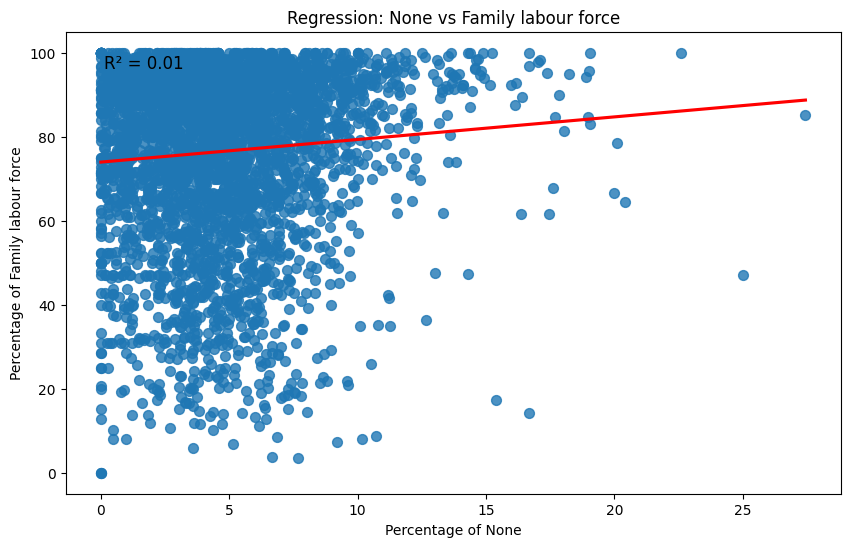

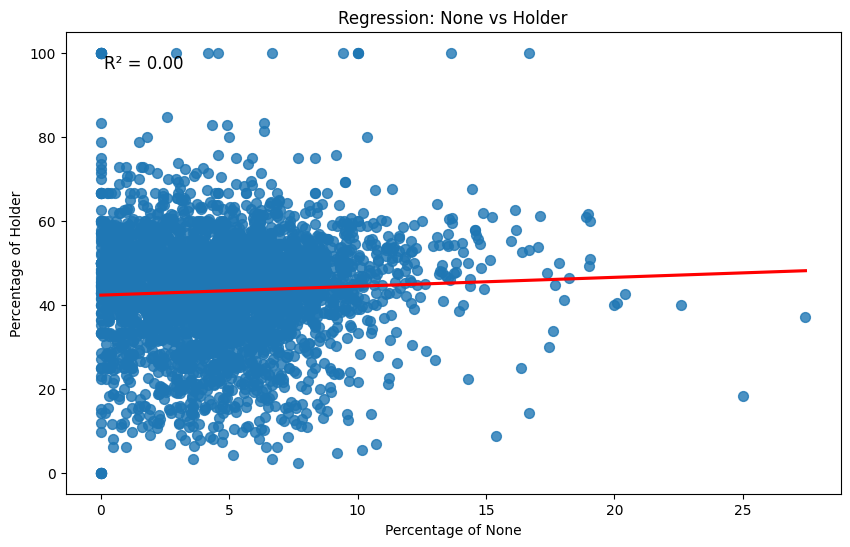

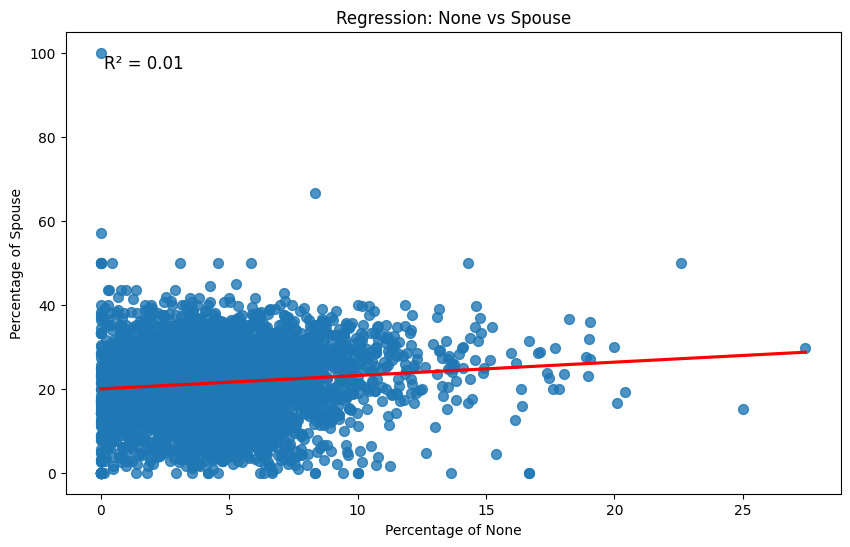

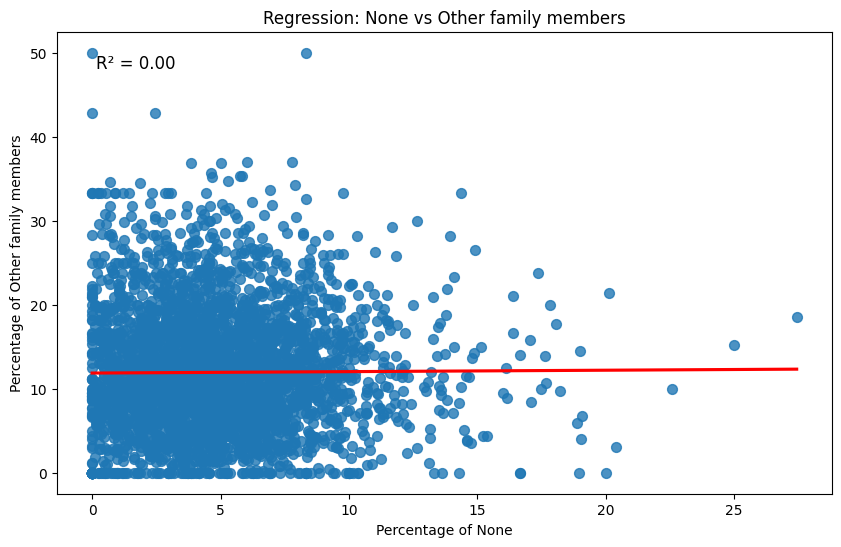

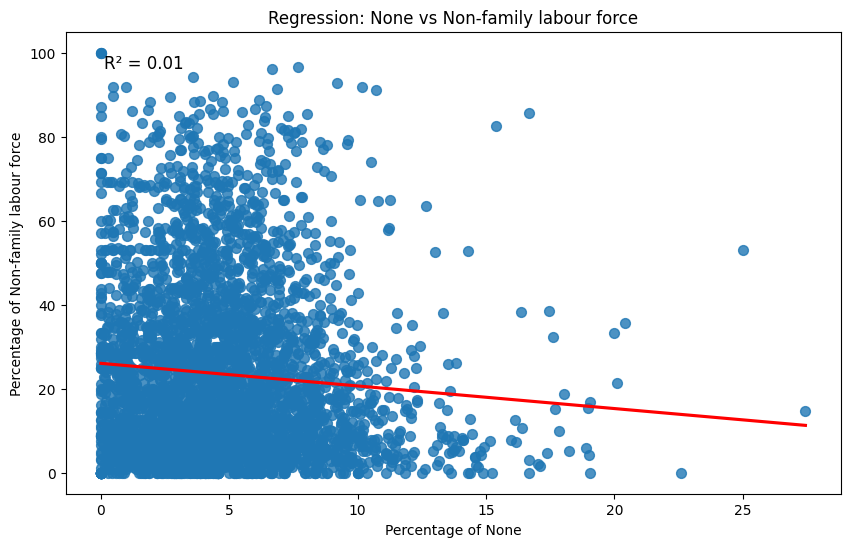

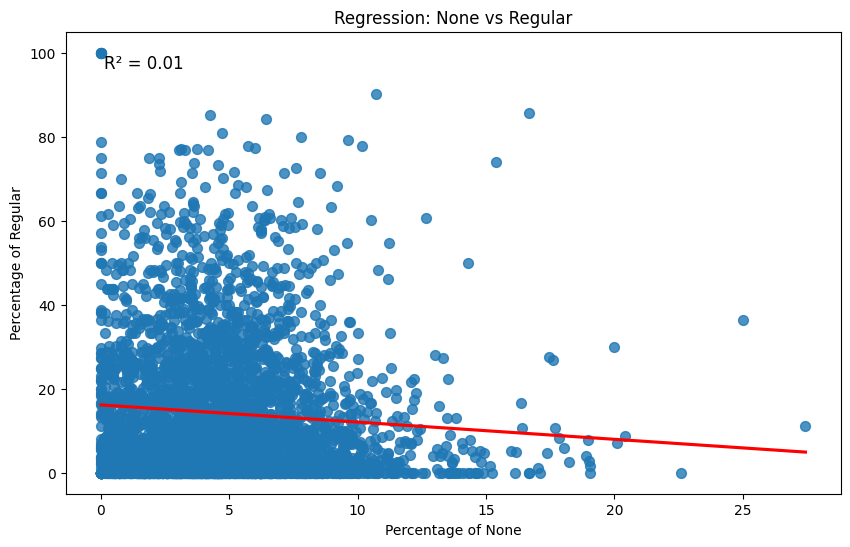

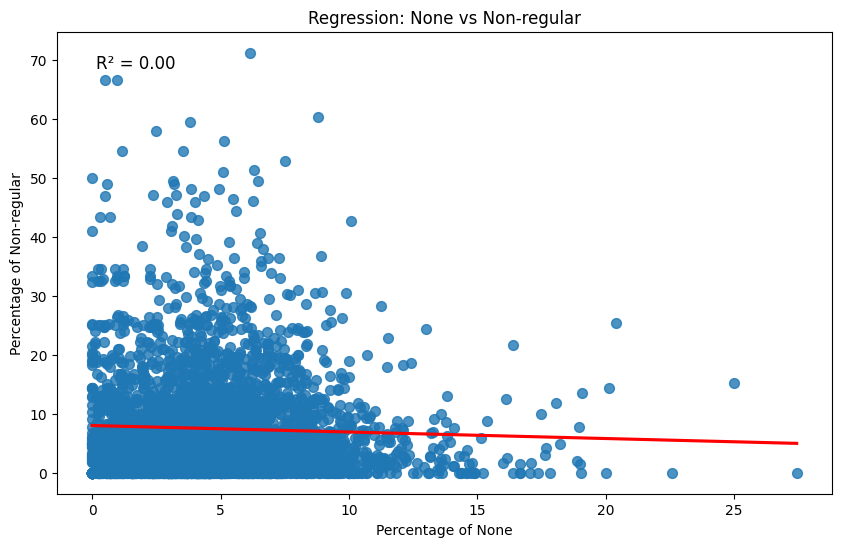

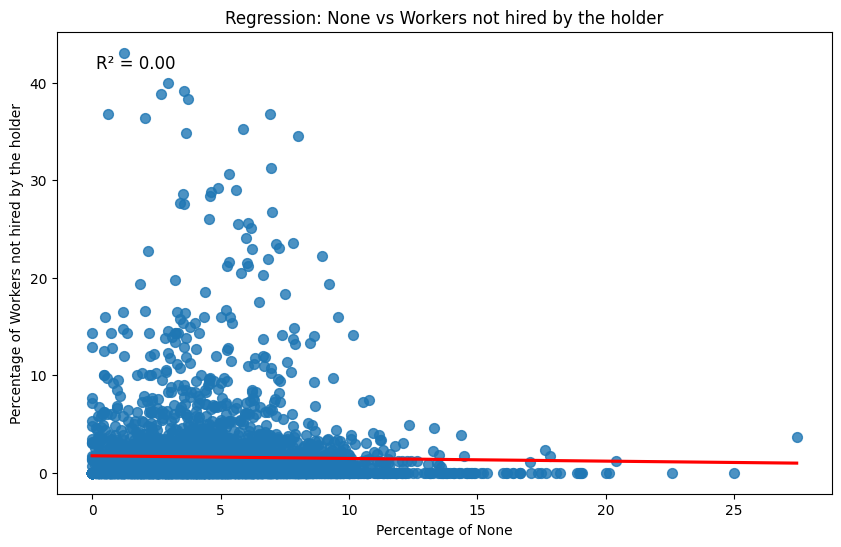

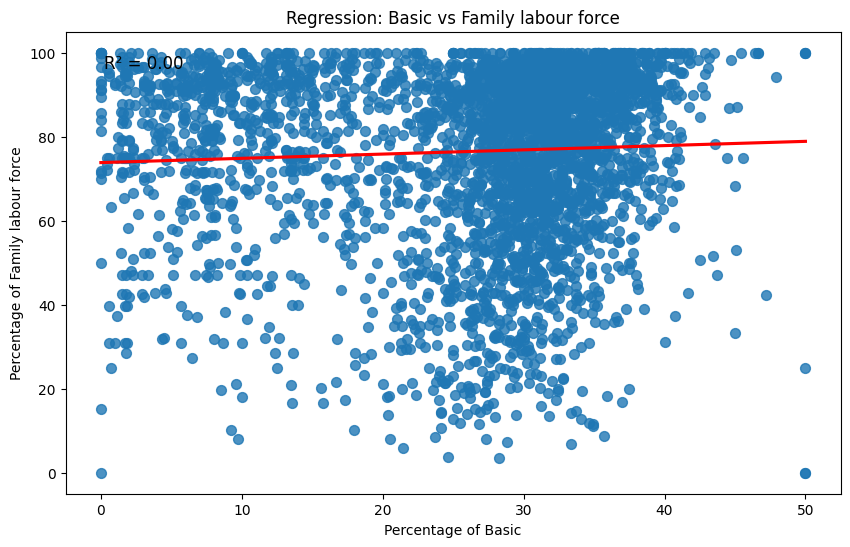

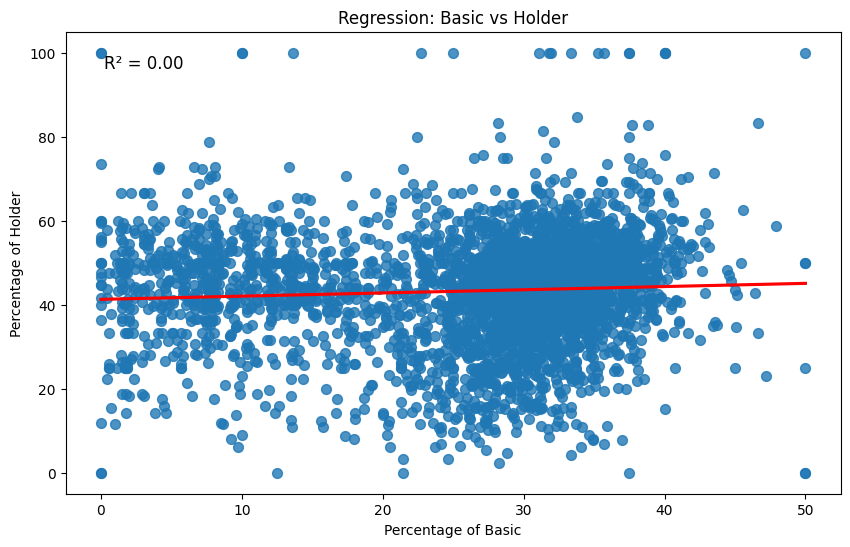

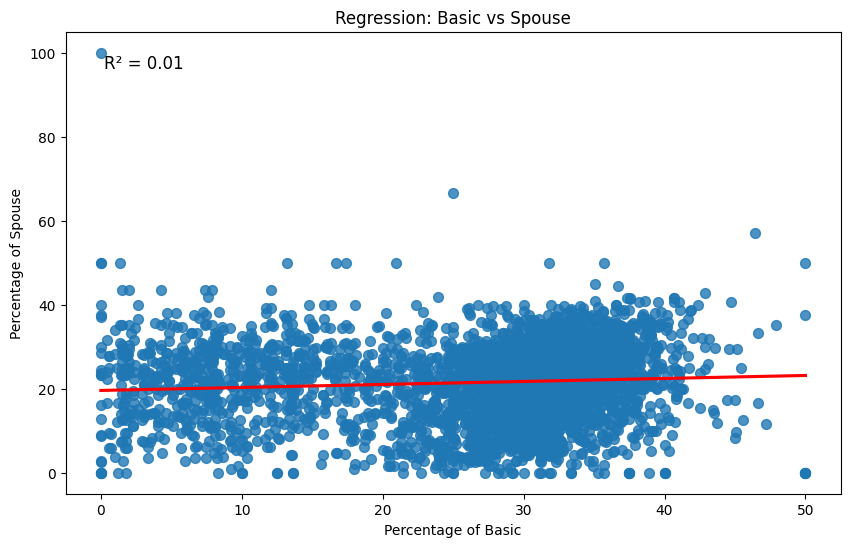

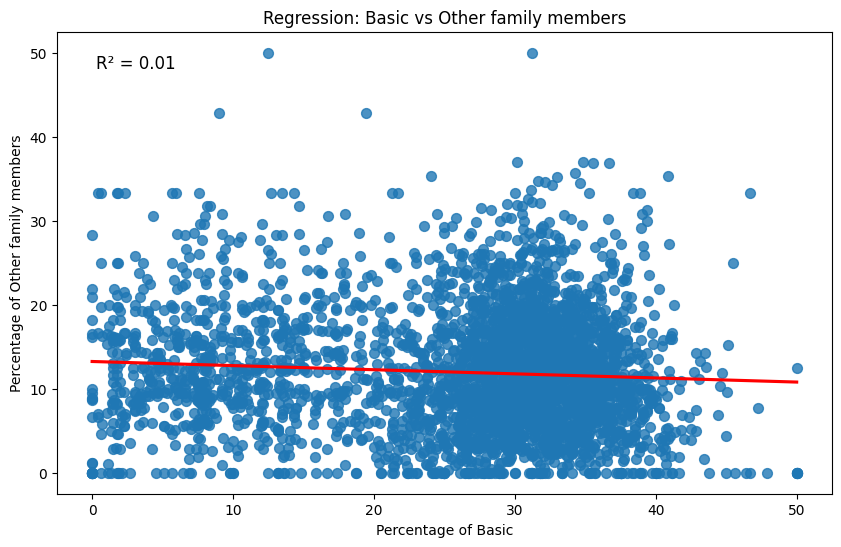

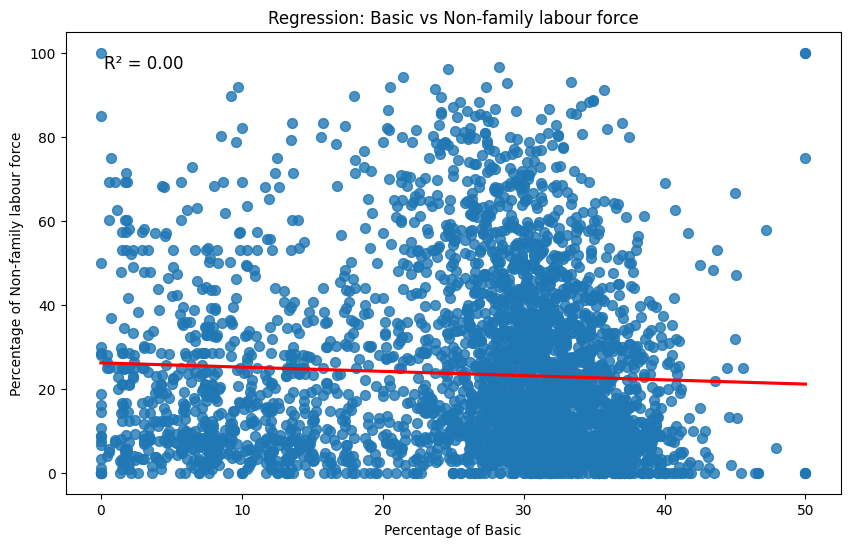

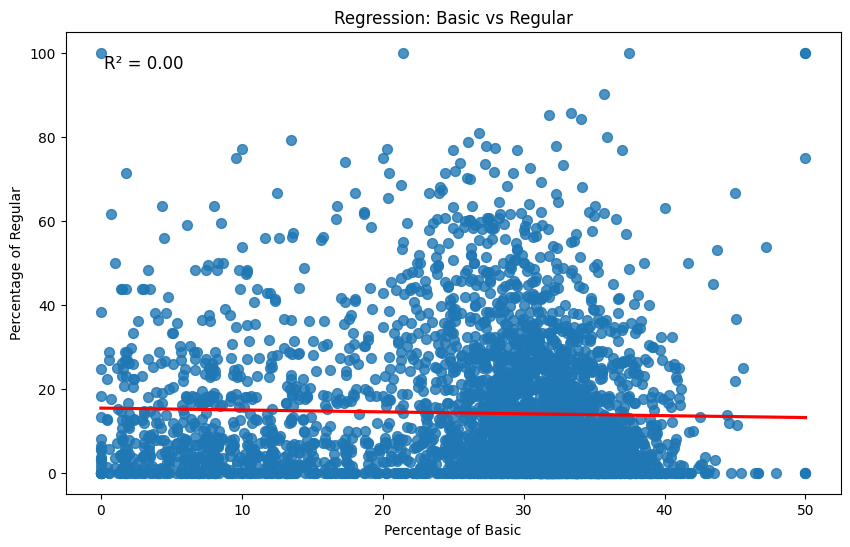

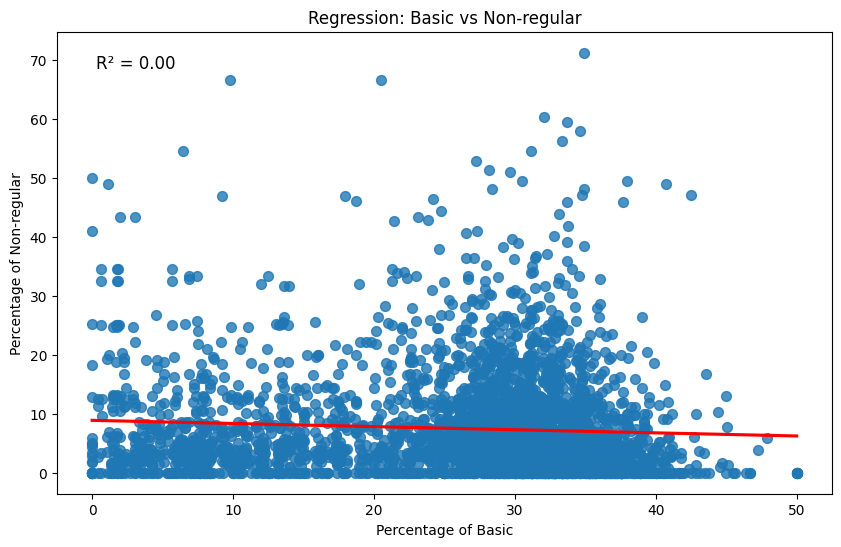

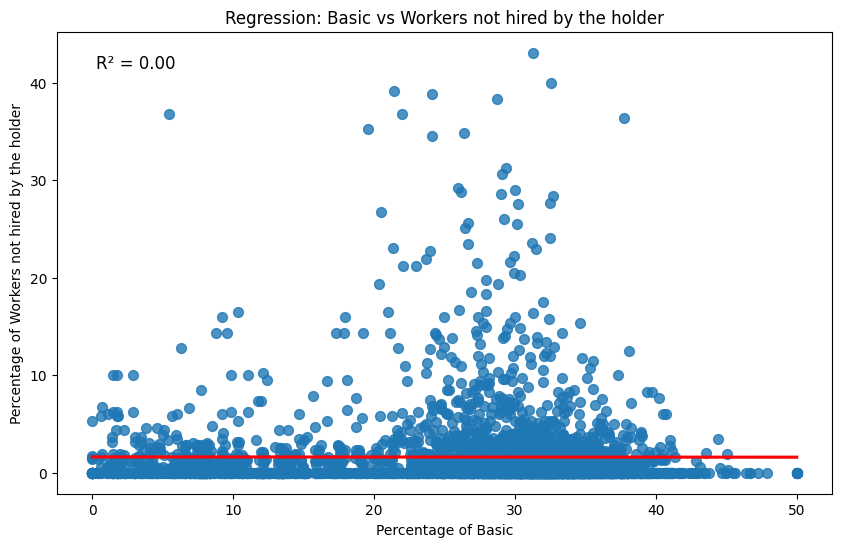

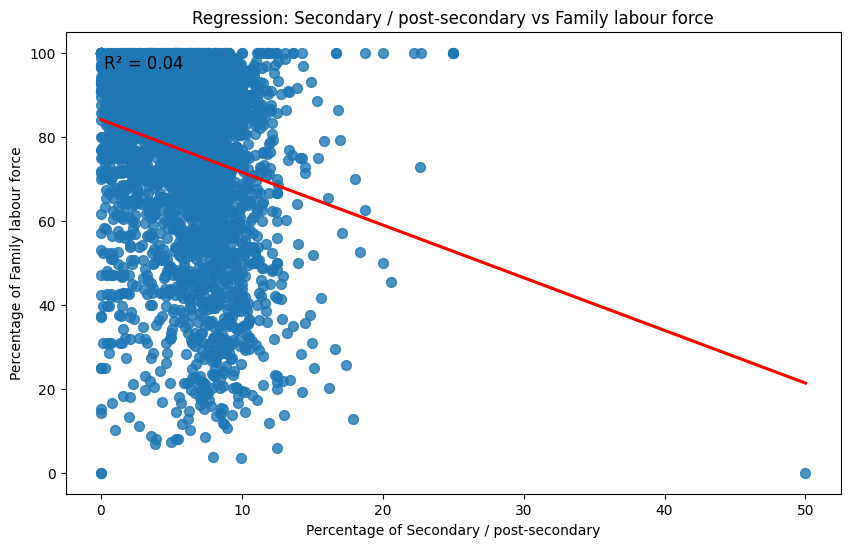

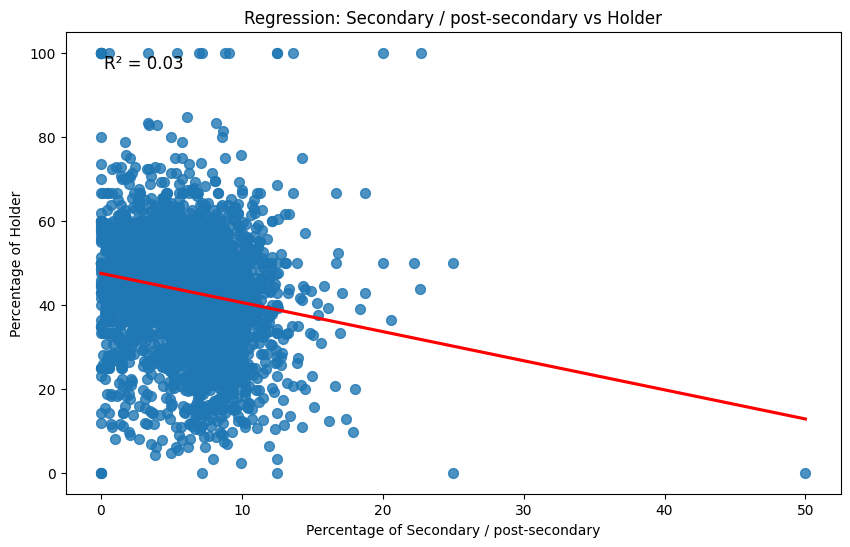

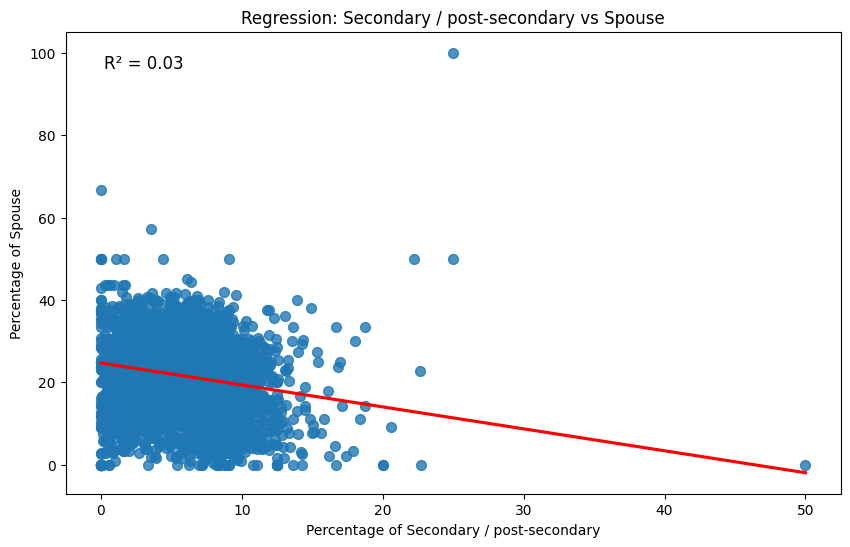

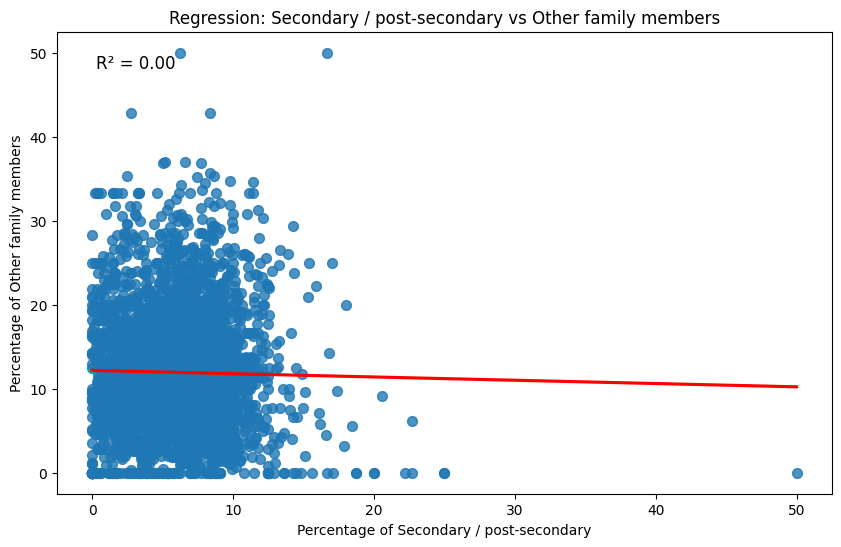

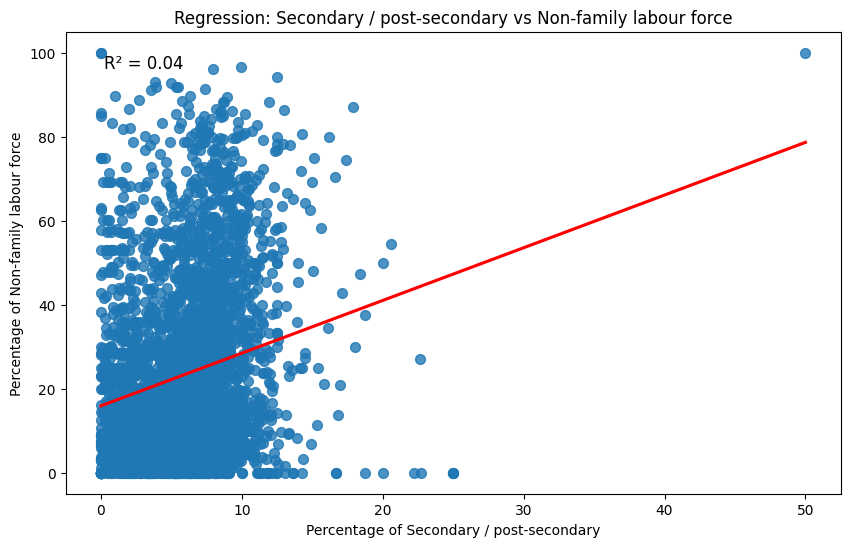

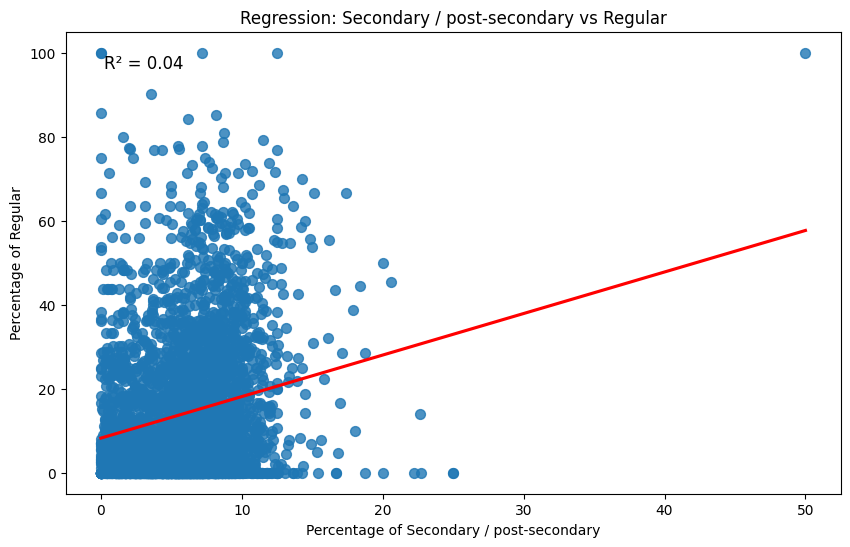

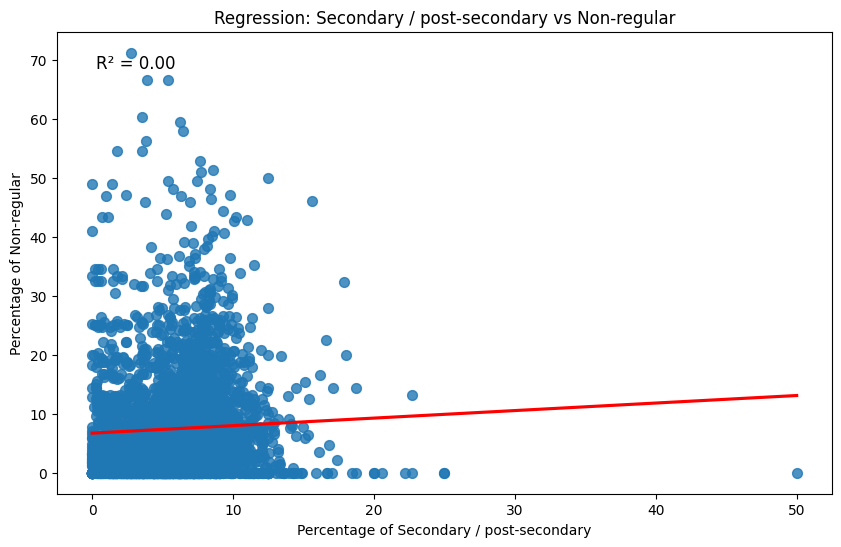

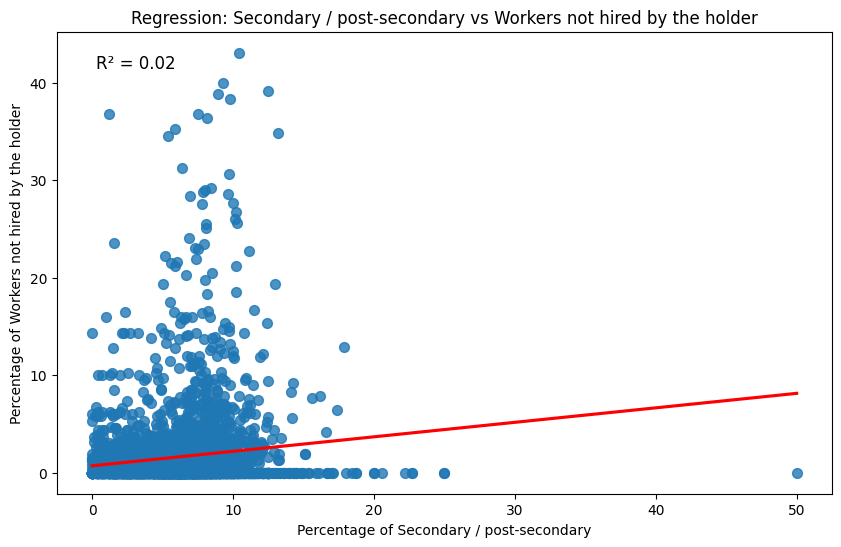

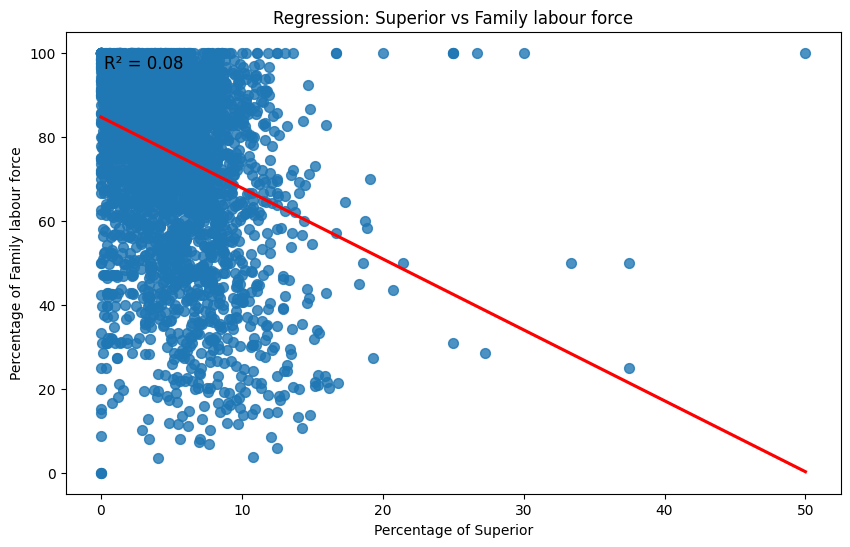

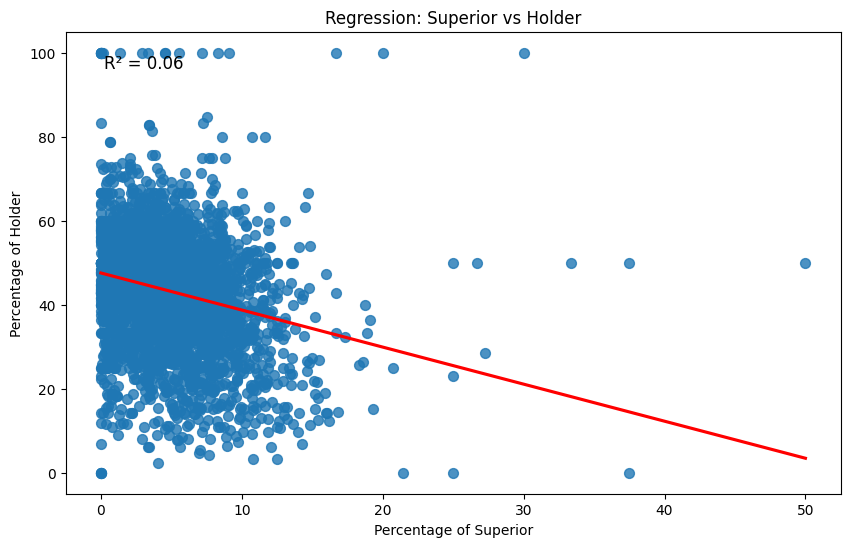

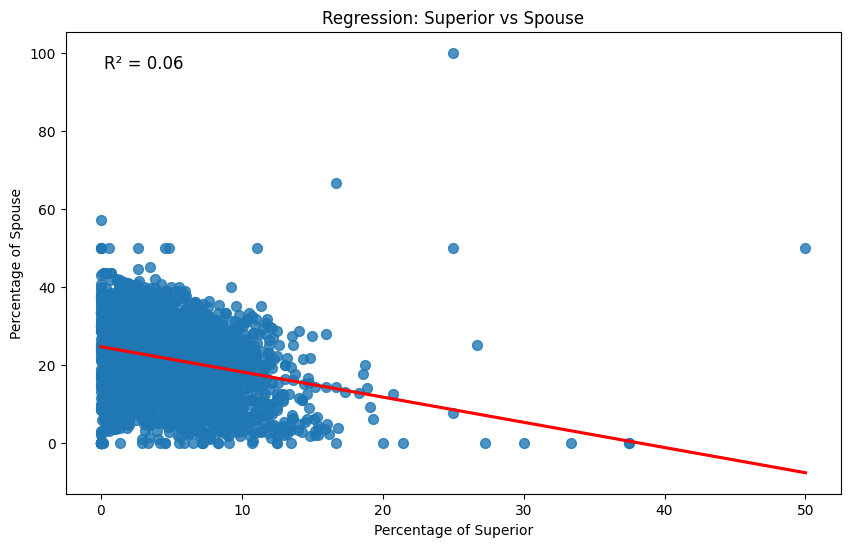

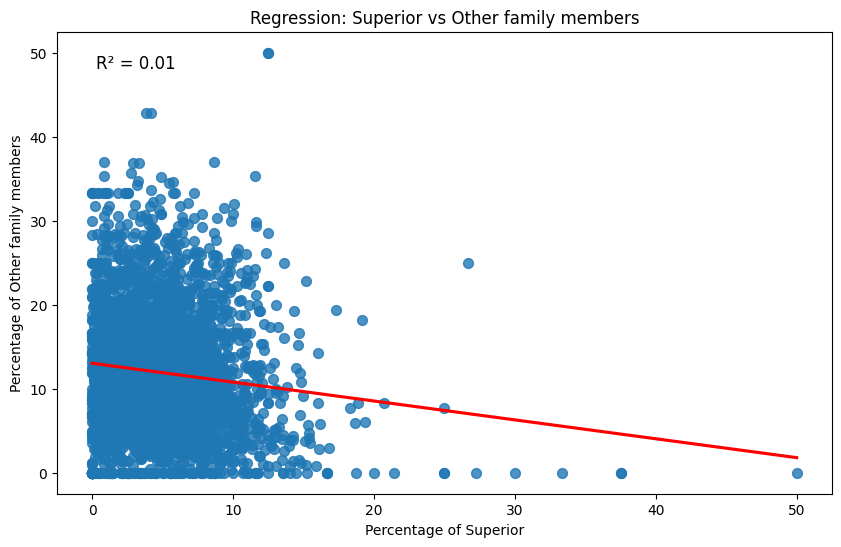

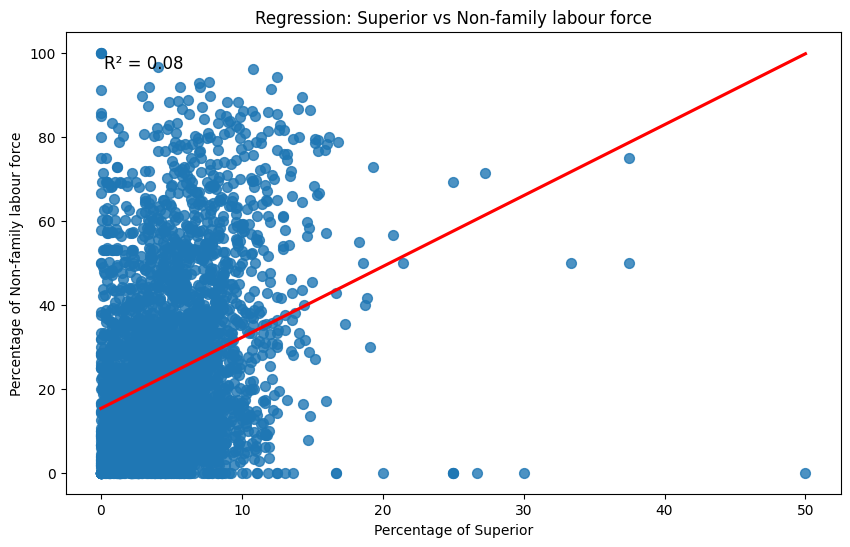

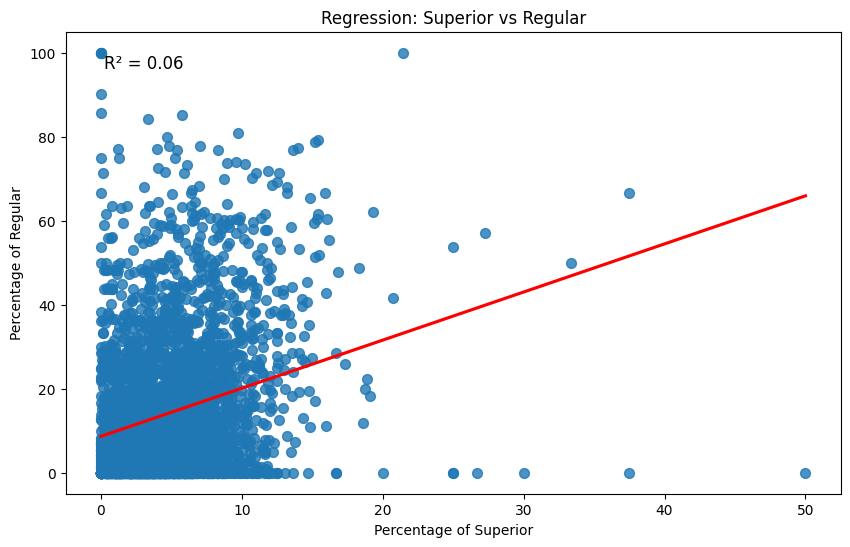

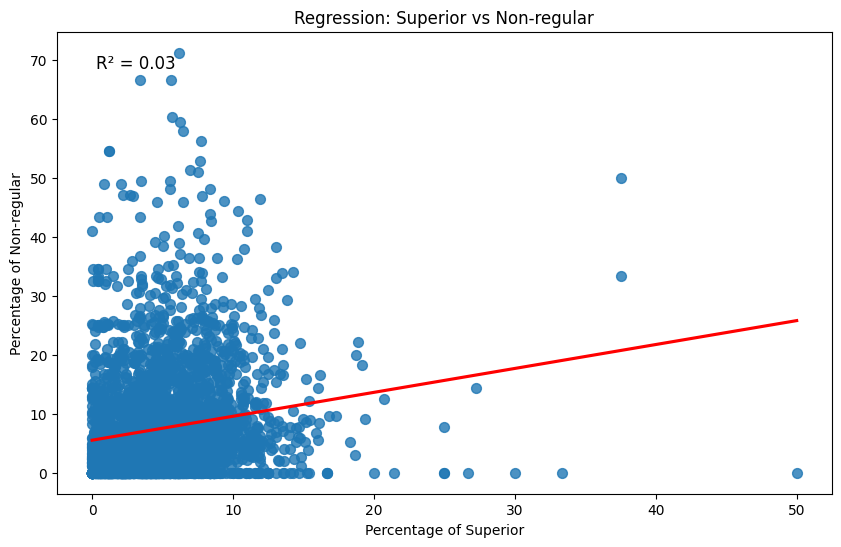

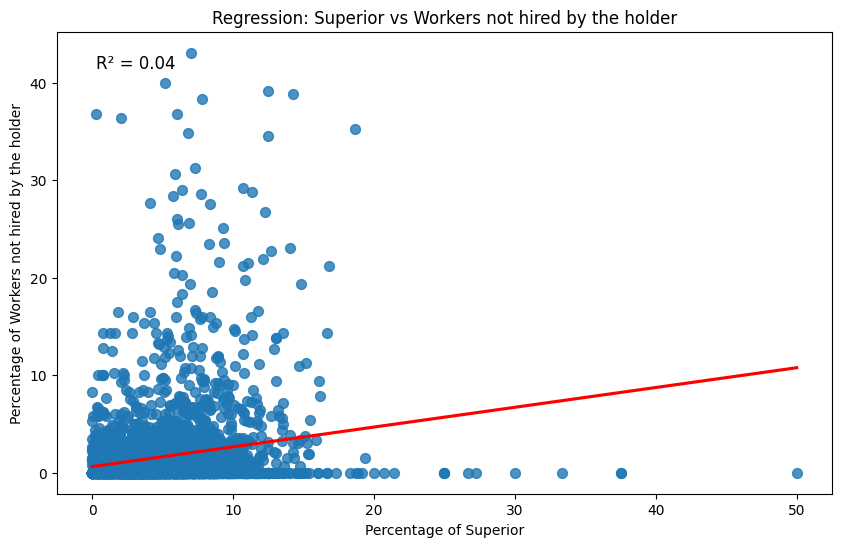

In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# Define education levels and types of labor force of interest
niveles_educacion = ['None', 'Basic', 'Secondary / post-secondary', 'Superior']
tipos_labor = ['Family labour force', 'Holder', 'Spouse',
               'Other family members', 'Non-family labour force', 'Regular', 'Non-regular',
               'Workers not hired by the holder']

# List to store the results
regression_results = []

# Iterate on each level of education and type of workforce.
for nivel_educacion in niveles_educacion:
    for tipo_labor in tipos_labor:
        # Filter dataframes by education level and type of workforce
        df_educacion_filtrado = education_NUTS5_df[education_NUTS5_df['el.education_level'] == nivel_educacion]
        df_labor_filtrado = labour_NUTS5_df[labour_NUTS5_df['ltn.type_labour'] == tipo_labor]
        
        # Combinar los dataframes filtrados usando merge
        df_combinado = pd.merge(df_educacion_filtrado, df_labor_filtrado, on='region_name', how='inner').dropna()
        
        # Asegurarse de que haya suficientes datos para realizar el análisis
        if len(df_combinado) > 1:
            # Ajustar el modelo de regresión lineal y calcular R²
            X = df_combinado['percentage_x'].values.reshape(-1, 1)
            y = df_combinado['percentage_y'].values
            model = LinearRegression().fit(X, y)
            r2 = model.score(X, y)
            
            # Almacenar los resultados en la lista
            regression_results.append({
                'Education Level': nivel_educacion,
                'Type of Labor': tipo_labor,
                'R²': r2
            })
            
            # Crear el scatter plot con línea de regresión
            plt.figure(figsize=(10, 6))
            sns.regplot(x='percentage_x', y='percentage_y', data=df_combinado, ci=None, scatter_kws={'s':50}, line_kws={'color':'red'})
            
            # Añadir R² al gráfico
            plt.text(0.05, 0.95, f'R² = {r2:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
            
            # Añadir títulos y etiquetas
            plt.title(f'Regression: {nivel_educacion} vs {tipo_labor}')
            plt.xlabel(f'Percentage of {nivel_educacion}')
            plt.ylabel(f'Percentage of {tipo_labor}')
            plt.grid(False)
            

# Create a dataframe from the regression results list
df_regression_results = pd.DataFrame(regression_results)

# Display regression results
print(df_regression_results)